# Compare vaccination strategies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']

strategies = [
    ('equal', EPIDEMIC['ws_vacc'], 'Pop only'),
    ('no_vacc', EPIDEMIC['ws_vacc'], 'No vaccination'),
    ('thl', EPIDEMIC['ws_vacc'], 'Pop, Inf and Hosp'),
    ('thl', [1/2, 1/2, 0], 'Pop and Hosp'),
    ('thl', [1/2, 0, 1/2], 'Pop and Inf'),
    ('thl', [0, 1/2, 1/2], 'Hosp and Inf'),
    ('thl', [0, 1, 0], 'Hosp only'),
    ('thl', [0, 0, 1], 'Inf only'),
]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=True,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0)

rho: 42.283667081033315
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: Pop only. 1/8
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: No vaccination. 2/8
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: Pop and Hosp. 4/8
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: Pop and Inf. 5/8
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: Hosp and Inf. 6/8
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: Hosp only. 7/8
Finished R: 1.0. Beta: 0.023649793620869705 1/4. Policy: Inf only. 8/8
Finished R: 1.25. Beta: 0.02956224202608713 2/4. Policy: Pop only. 1/8
Finished R: 1.25. Beta: 0.02956224202608713 2/4. Policy: No vaccination. 2/8
Finished R: 1.25. Beta: 0.02956224202608713 2/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.25. Beta: 0.02956224202608713 2/4. Policy: Pop and Hosp. 4/8
Finished R: 1.25. Beta: 0.02956224202608713 2/4. Policy: Pop and Inf. 5/8
Fini

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label)
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Pop and Inf: 123.63429988697456
Pop, Inf and Hosp: 123.6529474601126
Pop and Hosp: 123.68152488885802
Inf only: 123.77258014403264
Hosp and Inf: 123.78441159845937
Hosp only: 123.82618834320023
Pop only: 123.90819600668483


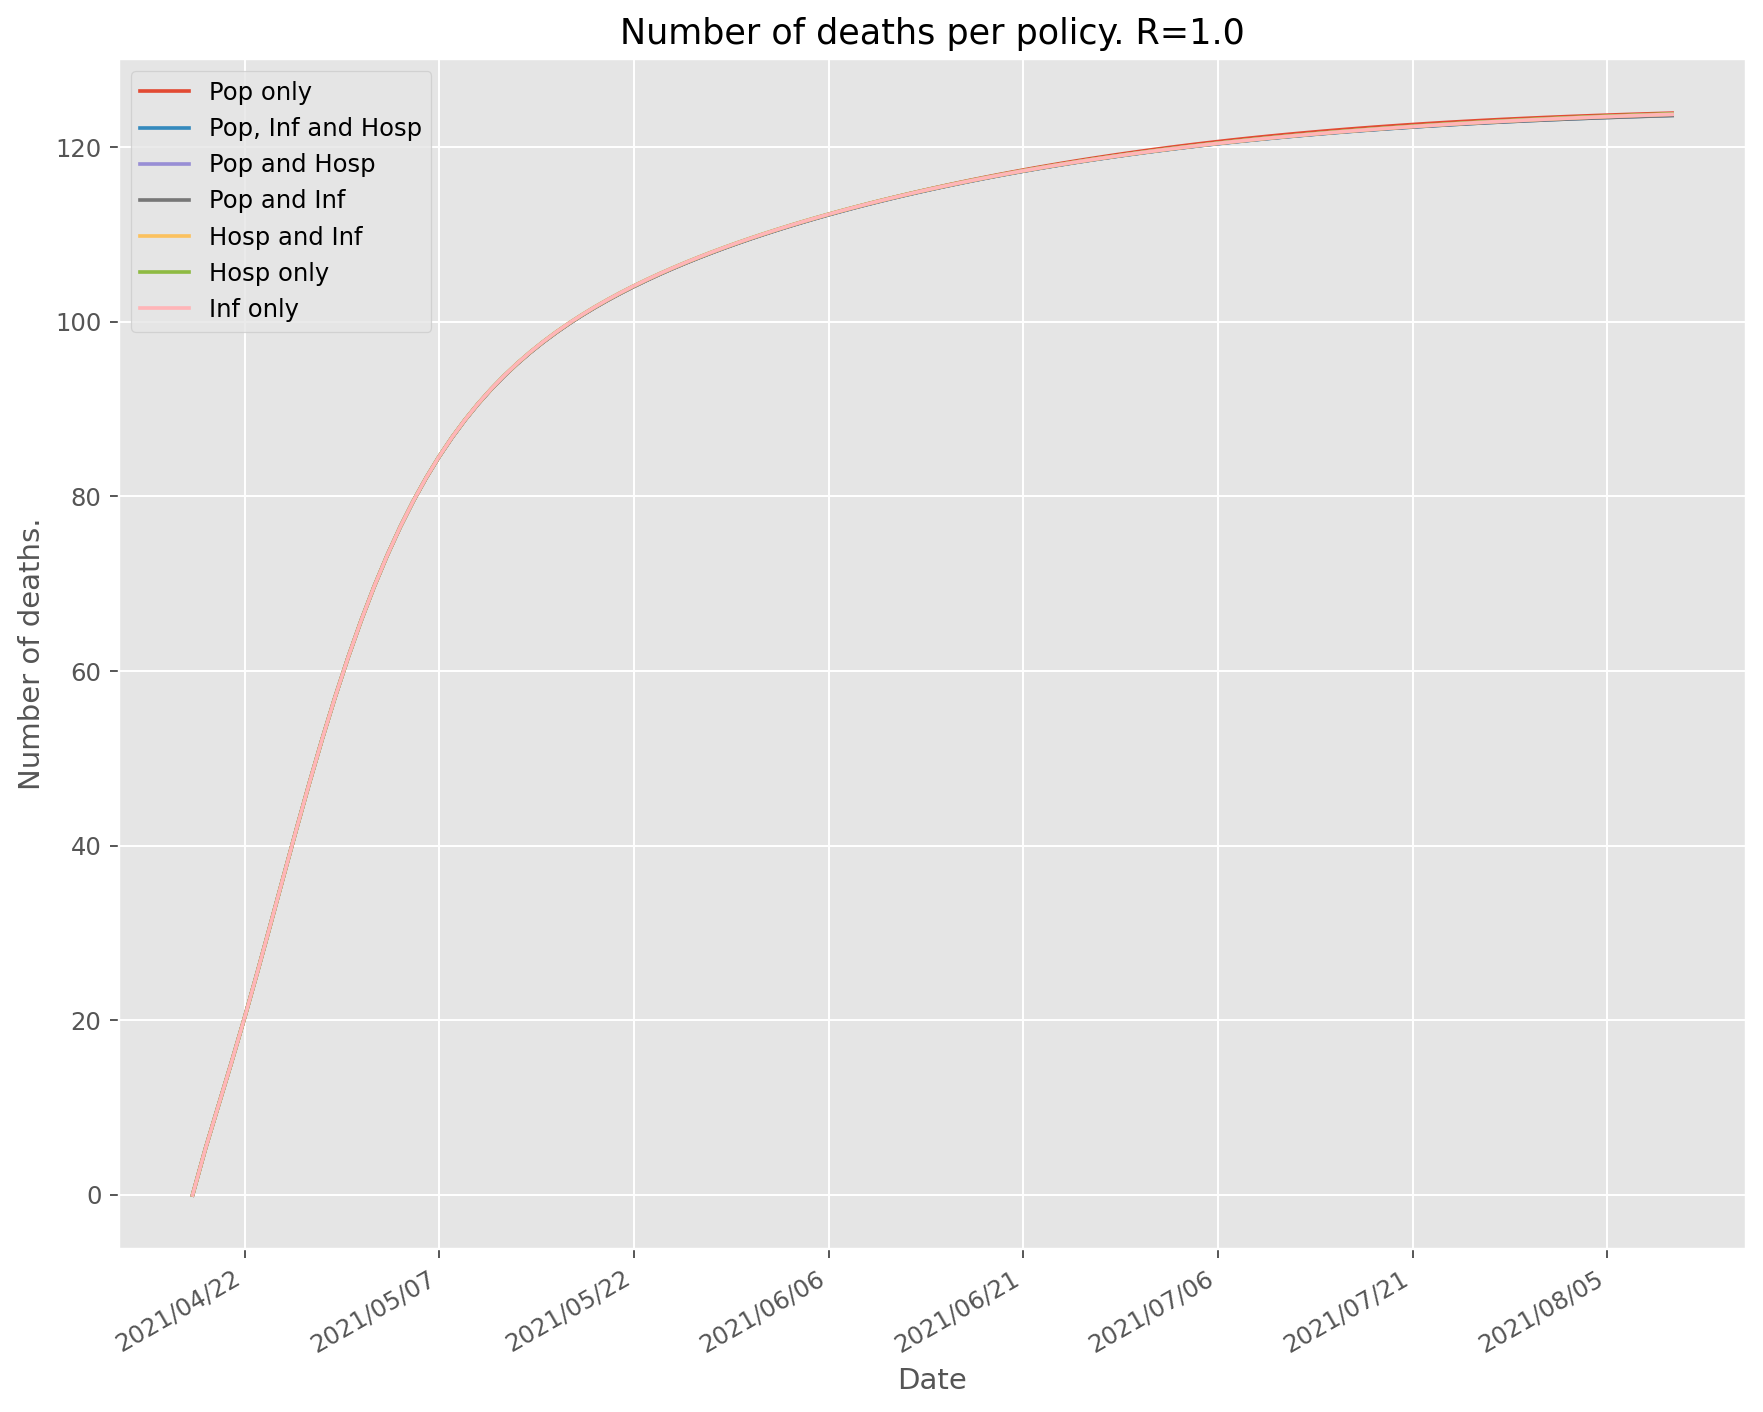

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 202.790161239304
Pop only: 202.82436908962575
Pop and Hosp: 203.09807767864226
Pop, Inf and Hosp: 203.49444035122258
Inf only: 205.1111292178923
Hosp and Inf: 205.27187535908666
Hosp only: 205.5296156818088


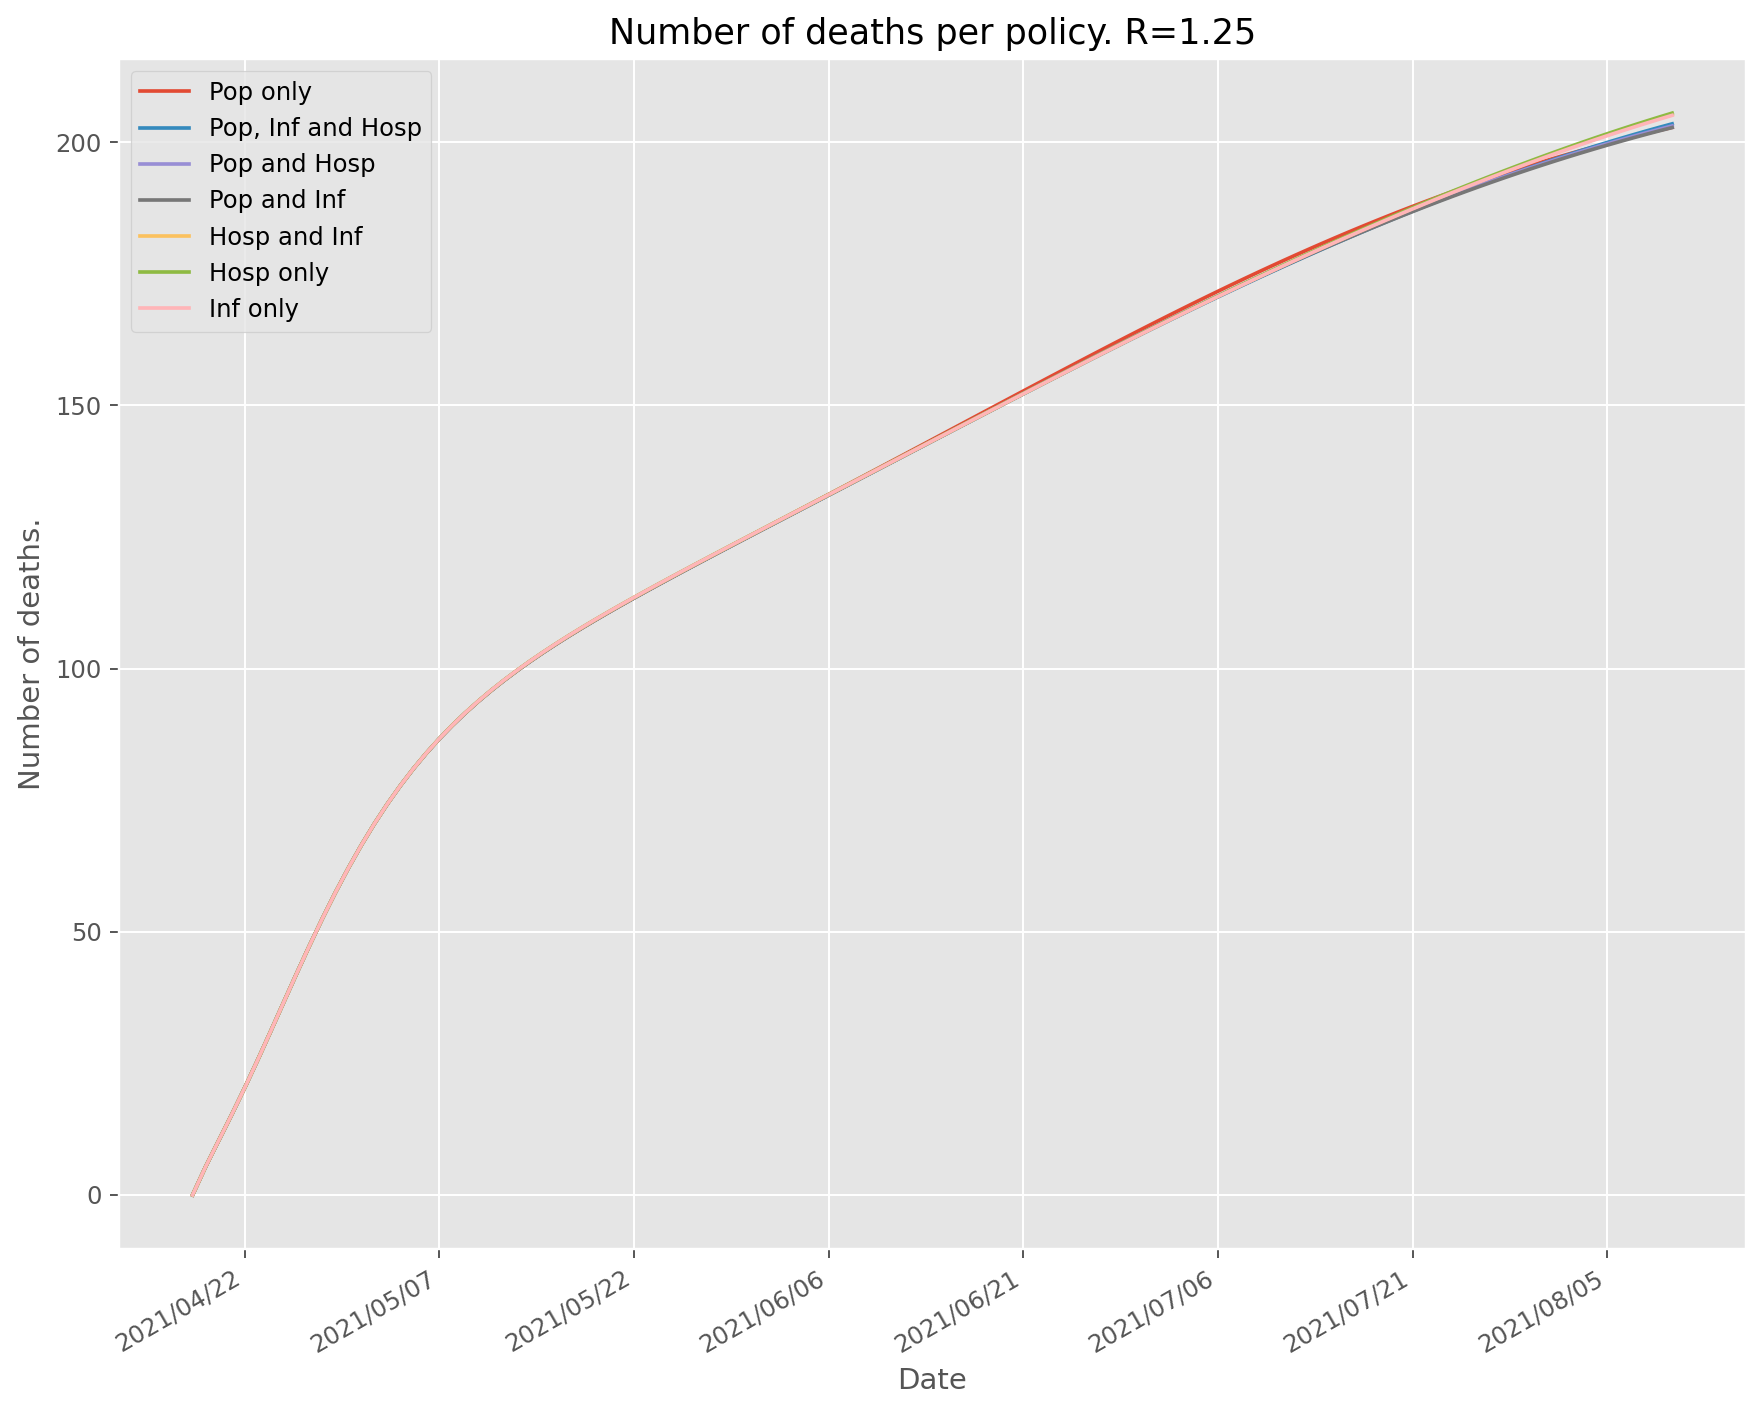

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 451.00761765903076
Pop and Inf: 460.00824662157777
Pop and Hosp: 461.3210632580922
Pop, Inf and Hosp: 465.3330542506449
Inf only: 476.0532459450847
Hosp and Inf: 476.65622395892126
Hosp only: 477.59044257323586


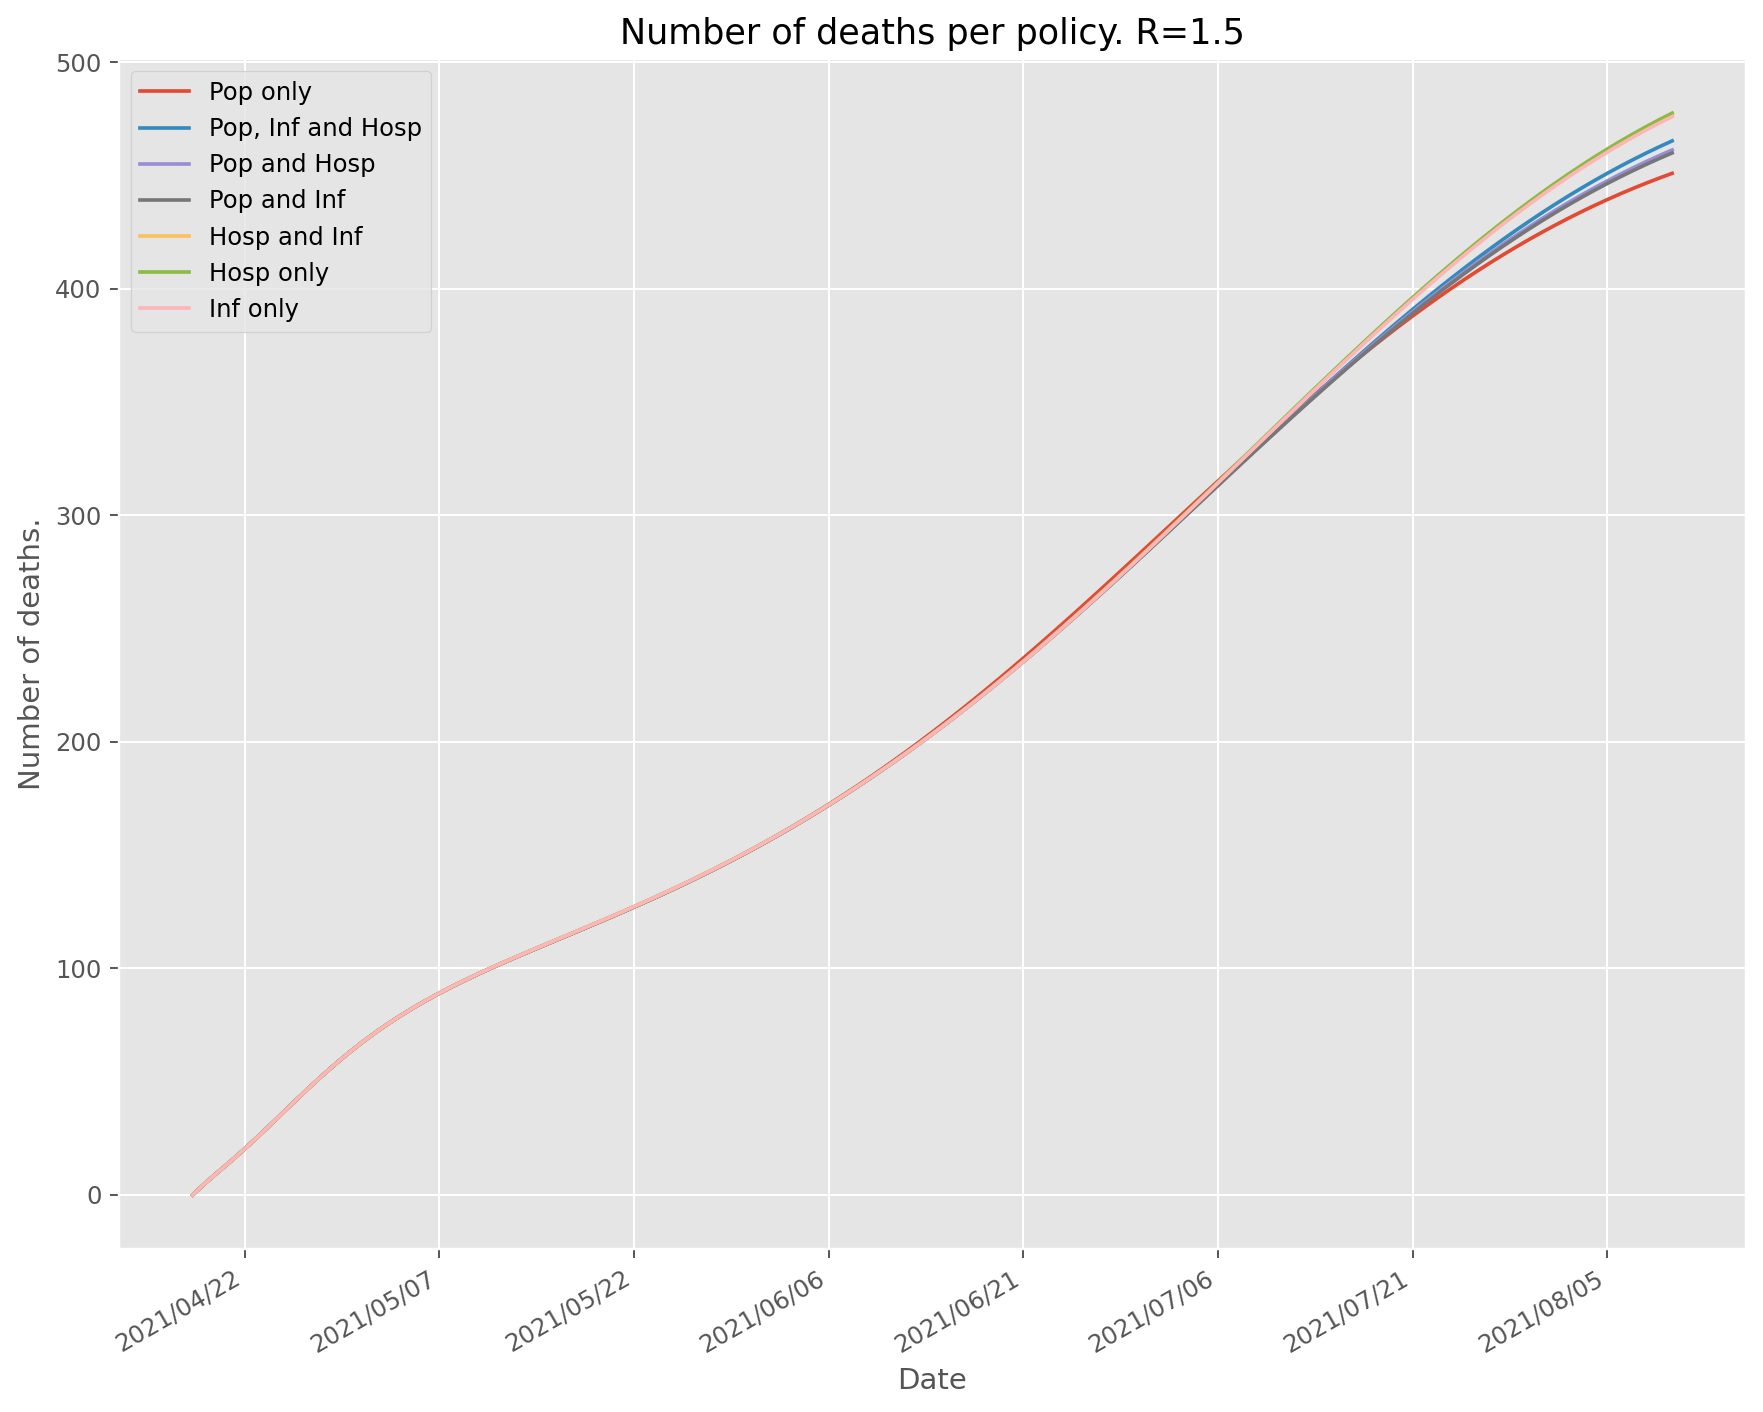

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1304.147599101195
Pop and Inf: 1335.7379152975818
Pop and Hosp: 1338.4275971778645
Pop, Inf and Hosp: 1350.4975161867212
Inf only: 1386.1647856373054
Hosp and Inf: 1386.6362243911024
Hosp only: 1388.0036563524218


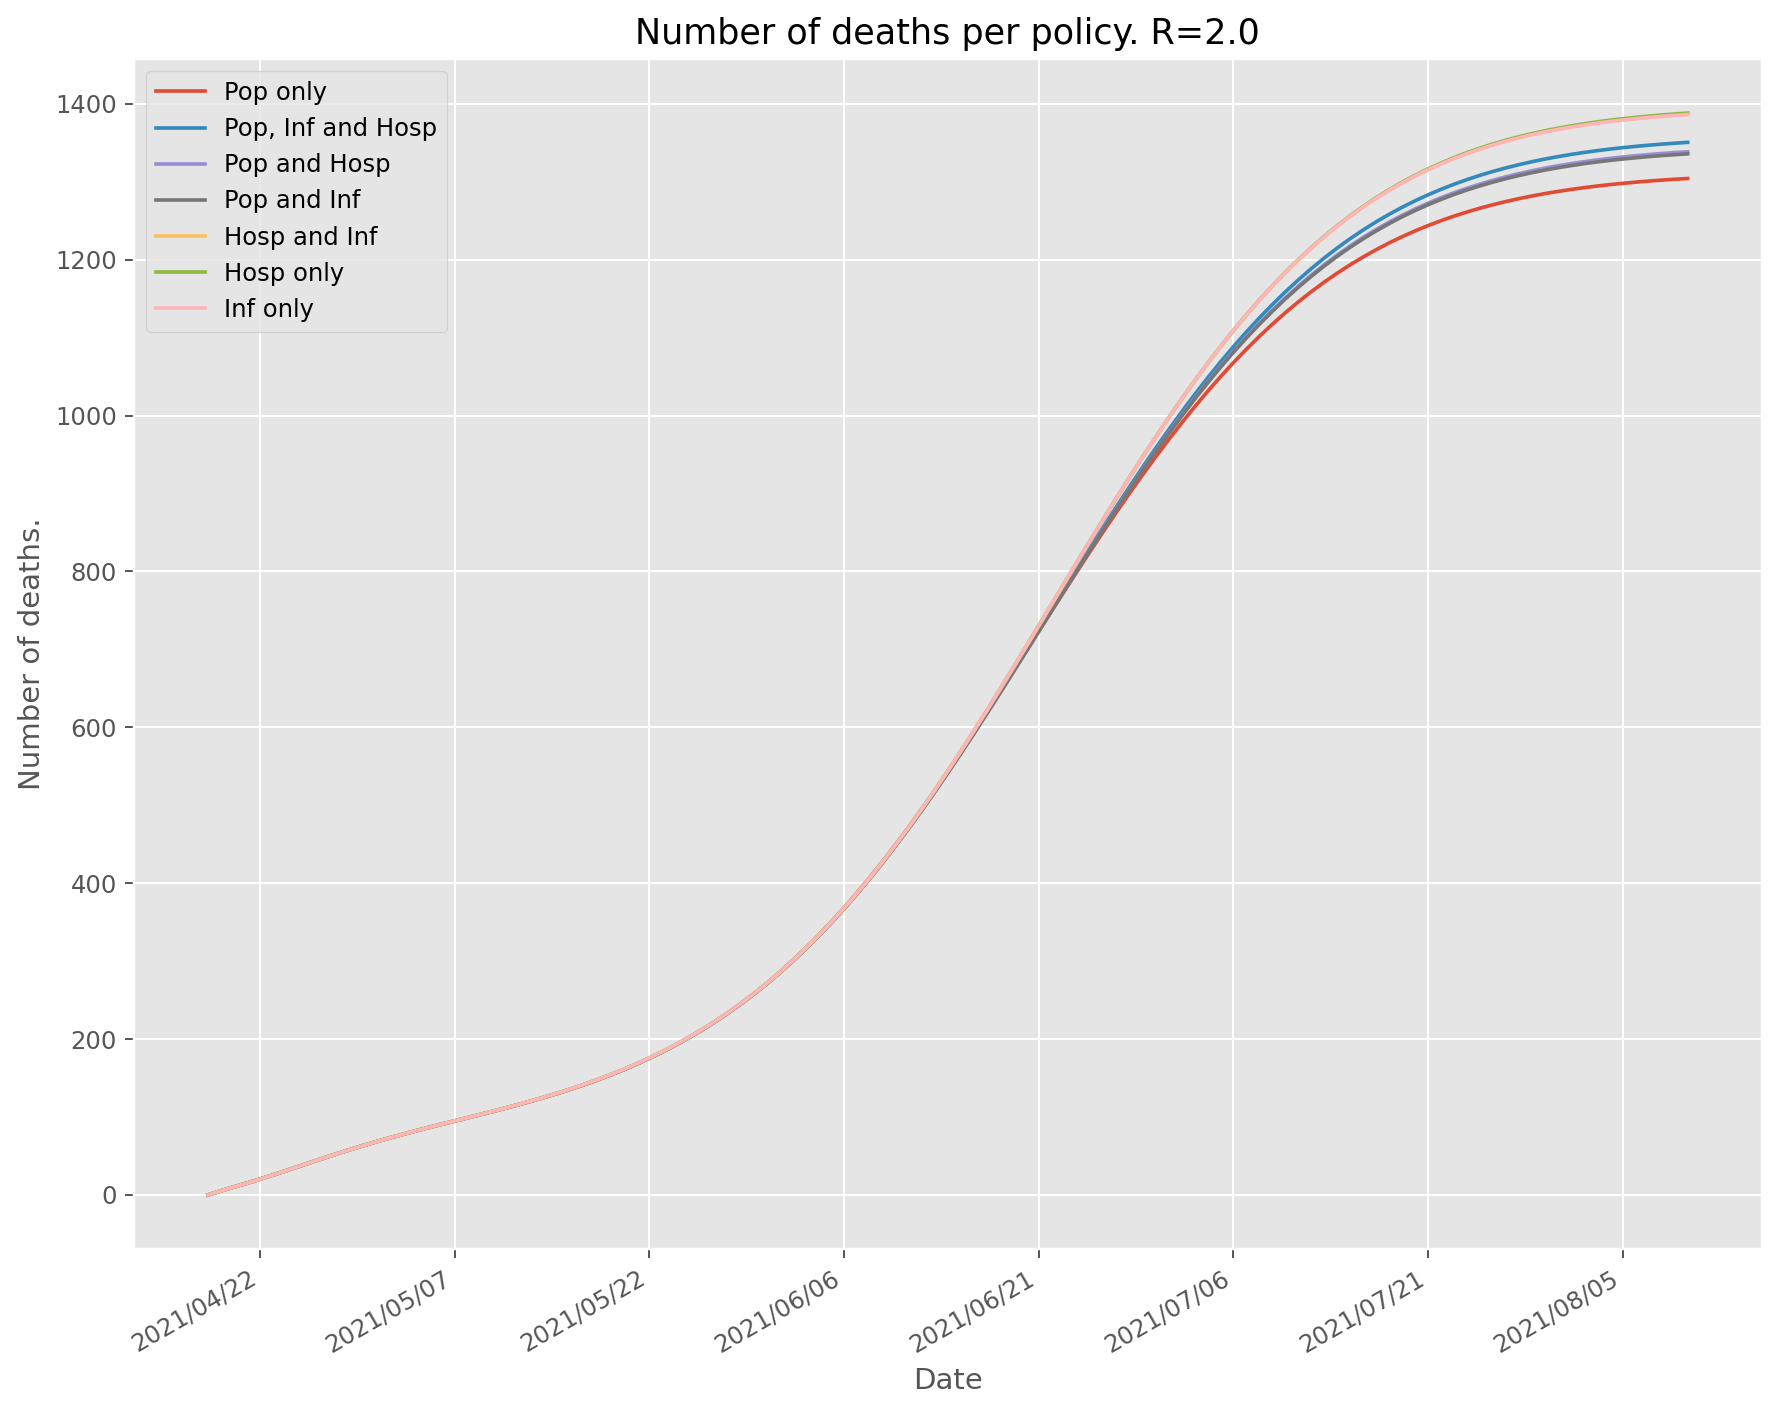

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Death incidence

Pop and Inf: 123.63429988697457
Pop, Inf and Hosp: 123.65294746011261
Pop and Hosp: 123.68152488885805
Inf only: 123.77258014403266
Hosp and Inf: 123.78441159845936
Hosp only: 123.82618834320024
Pop only: 123.90819600668483


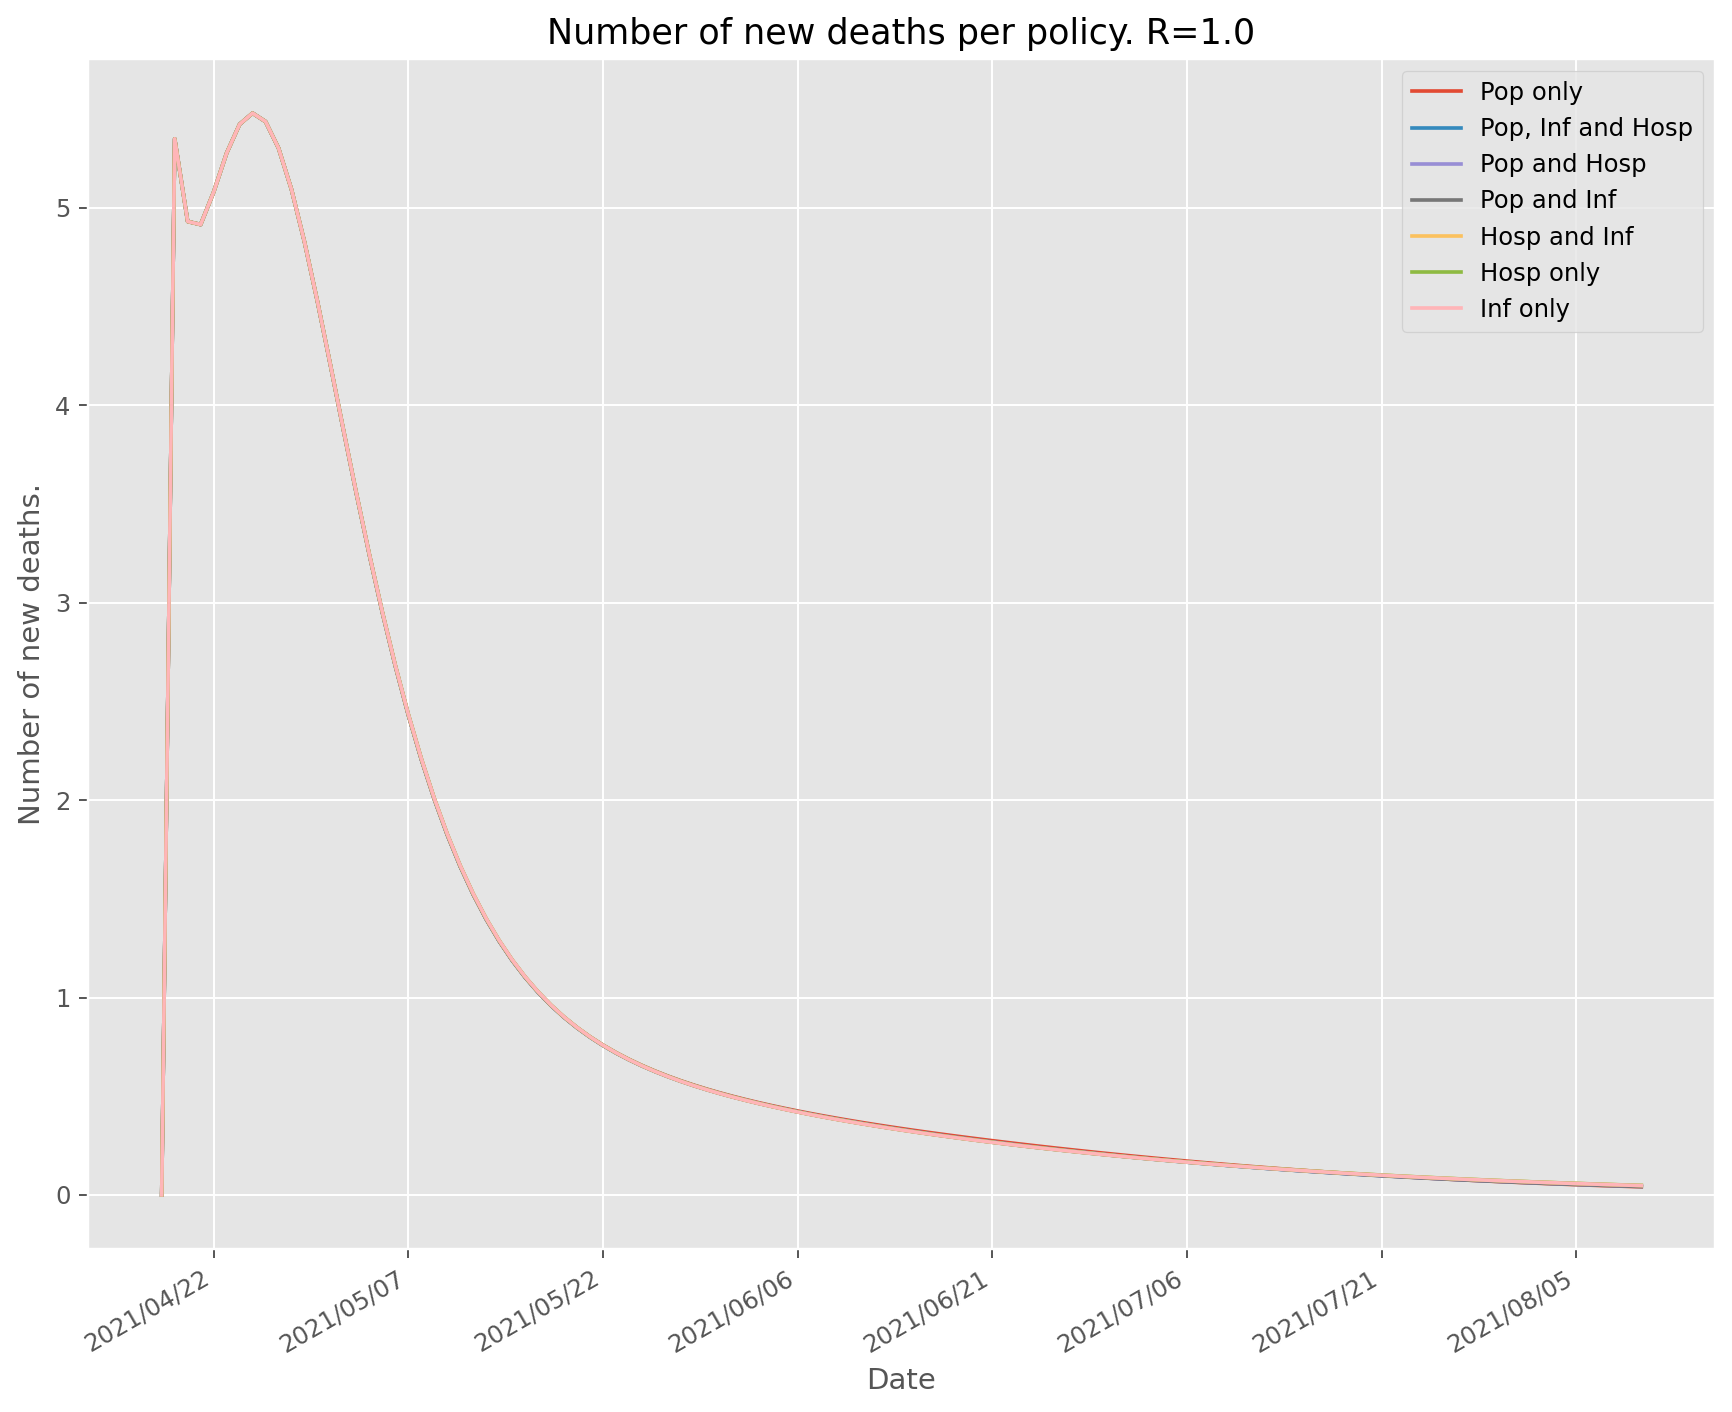

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 202.790161239304
Pop only: 202.82436908962575
Pop and Hosp: 203.09807767864228
Pop, Inf and Hosp: 203.49444035122258
Inf only: 205.11112921789226
Hosp and Inf: 205.27187535908672
Hosp only: 205.5296156818088


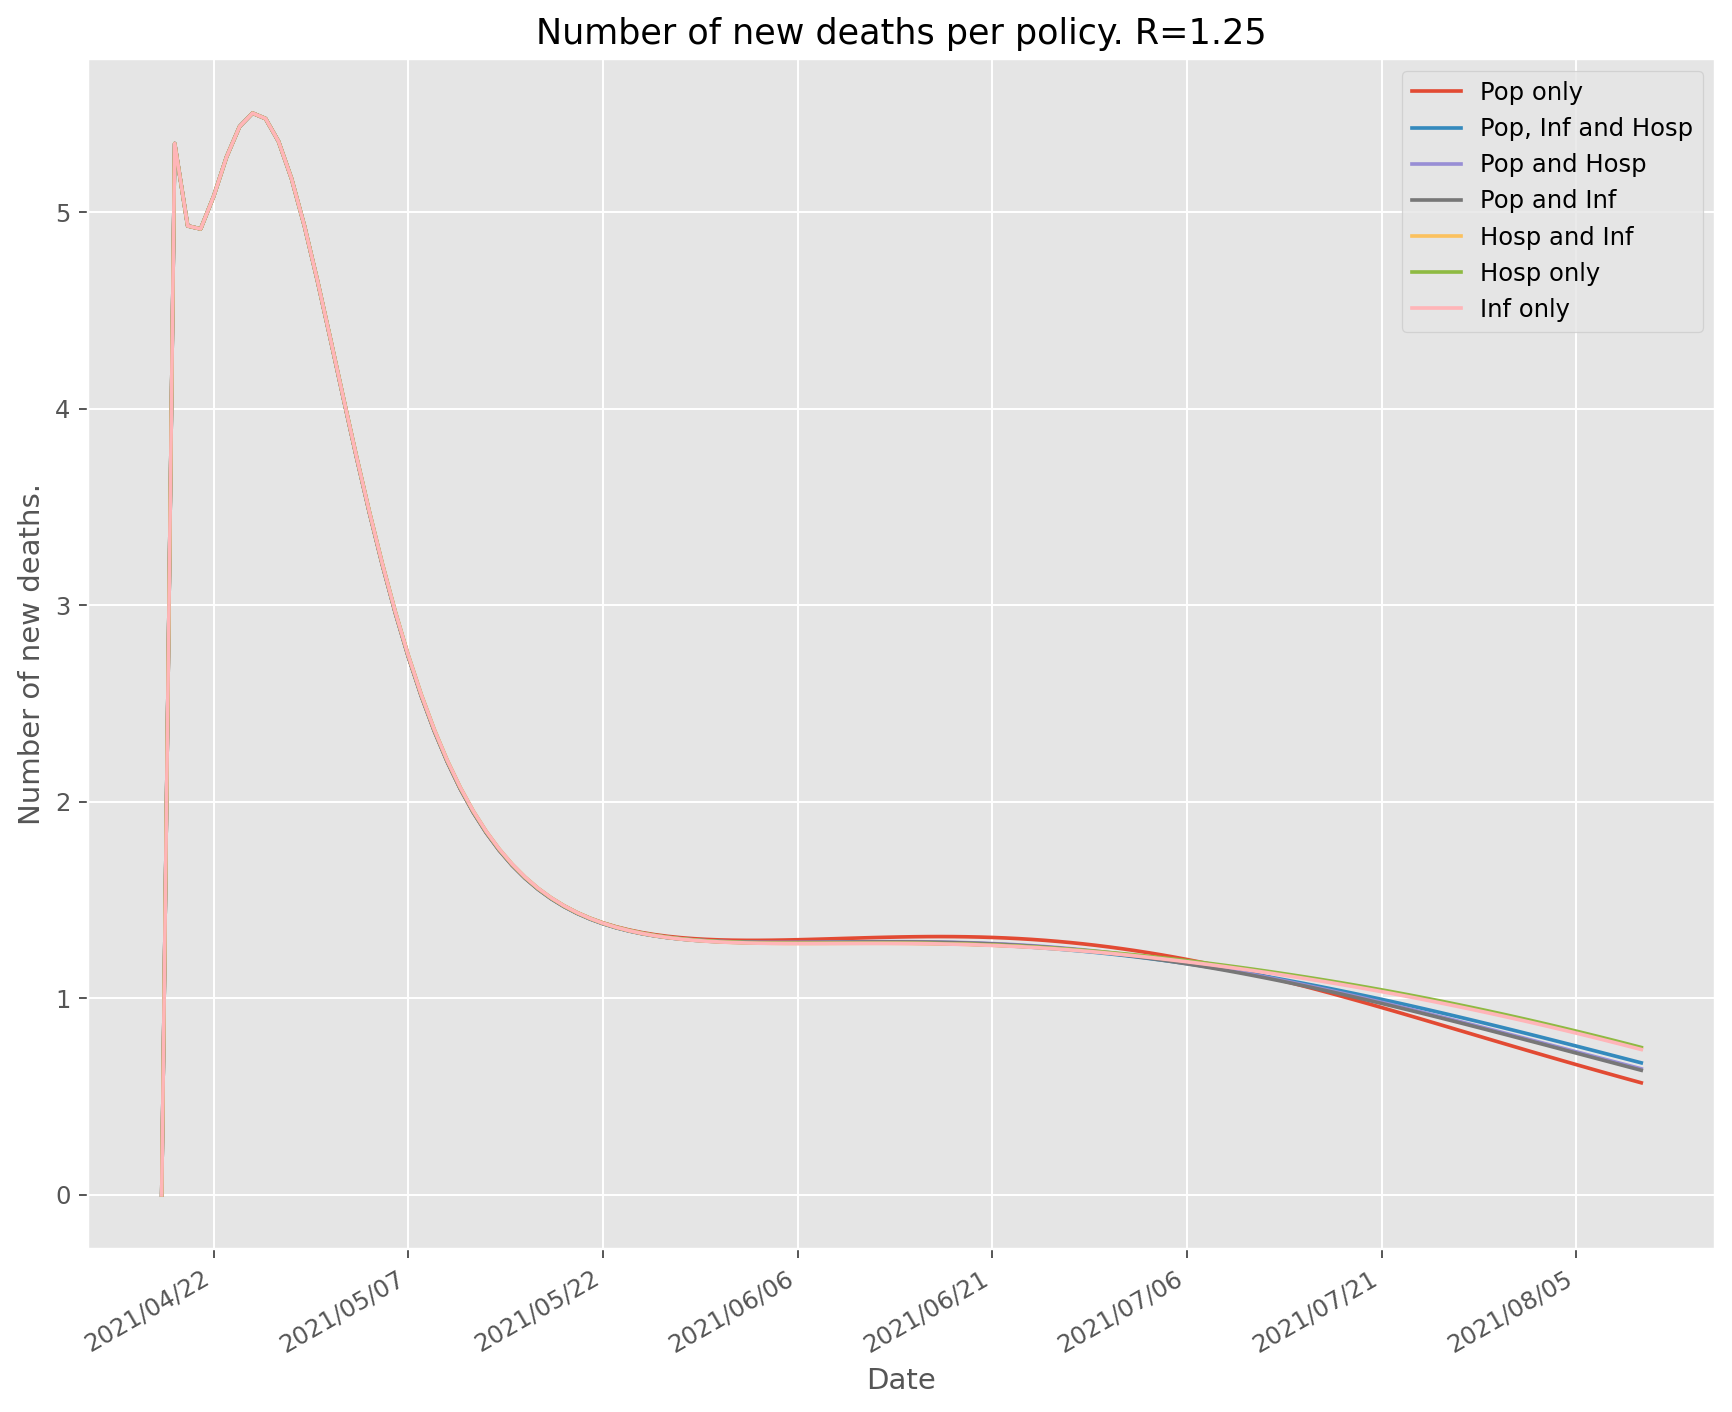

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 451.00761765903076
Pop and Inf: 460.0082466215779
Pop and Hosp: 461.3210632580921
Pop, Inf and Hosp: 465.3330542506448
Inf only: 476.05324594508465
Hosp and Inf: 476.65622395892126
Hosp only: 477.59044257323586


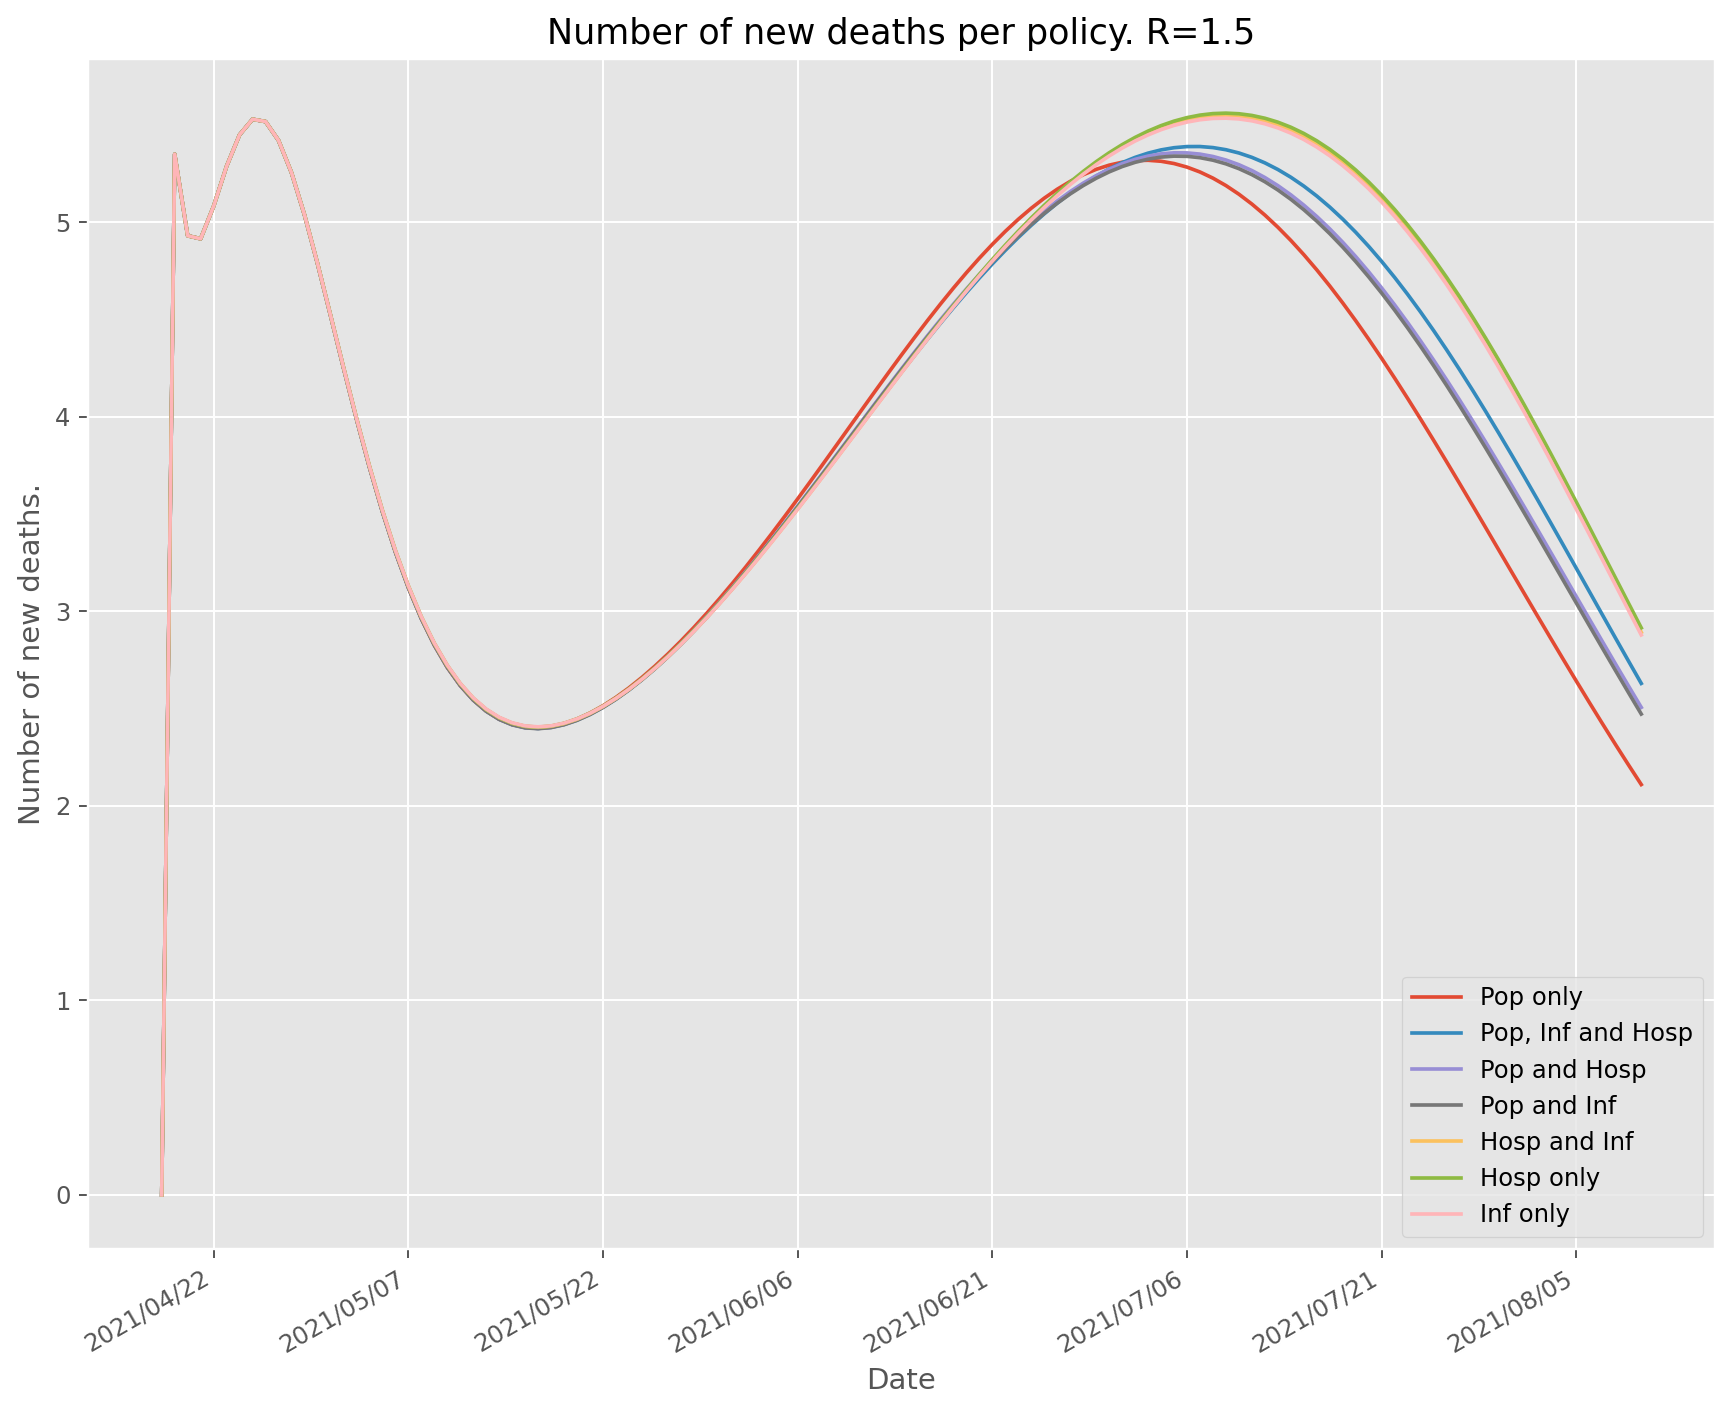

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1304.147599101195
Pop and Inf: 1335.7379152975818
Pop and Hosp: 1338.4275971778643
Pop, Inf and Hosp: 1350.4975161867214
Inf only: 1386.1647856373054
Hosp and Inf: 1386.6362243911026
Hosp only: 1388.0036563524216


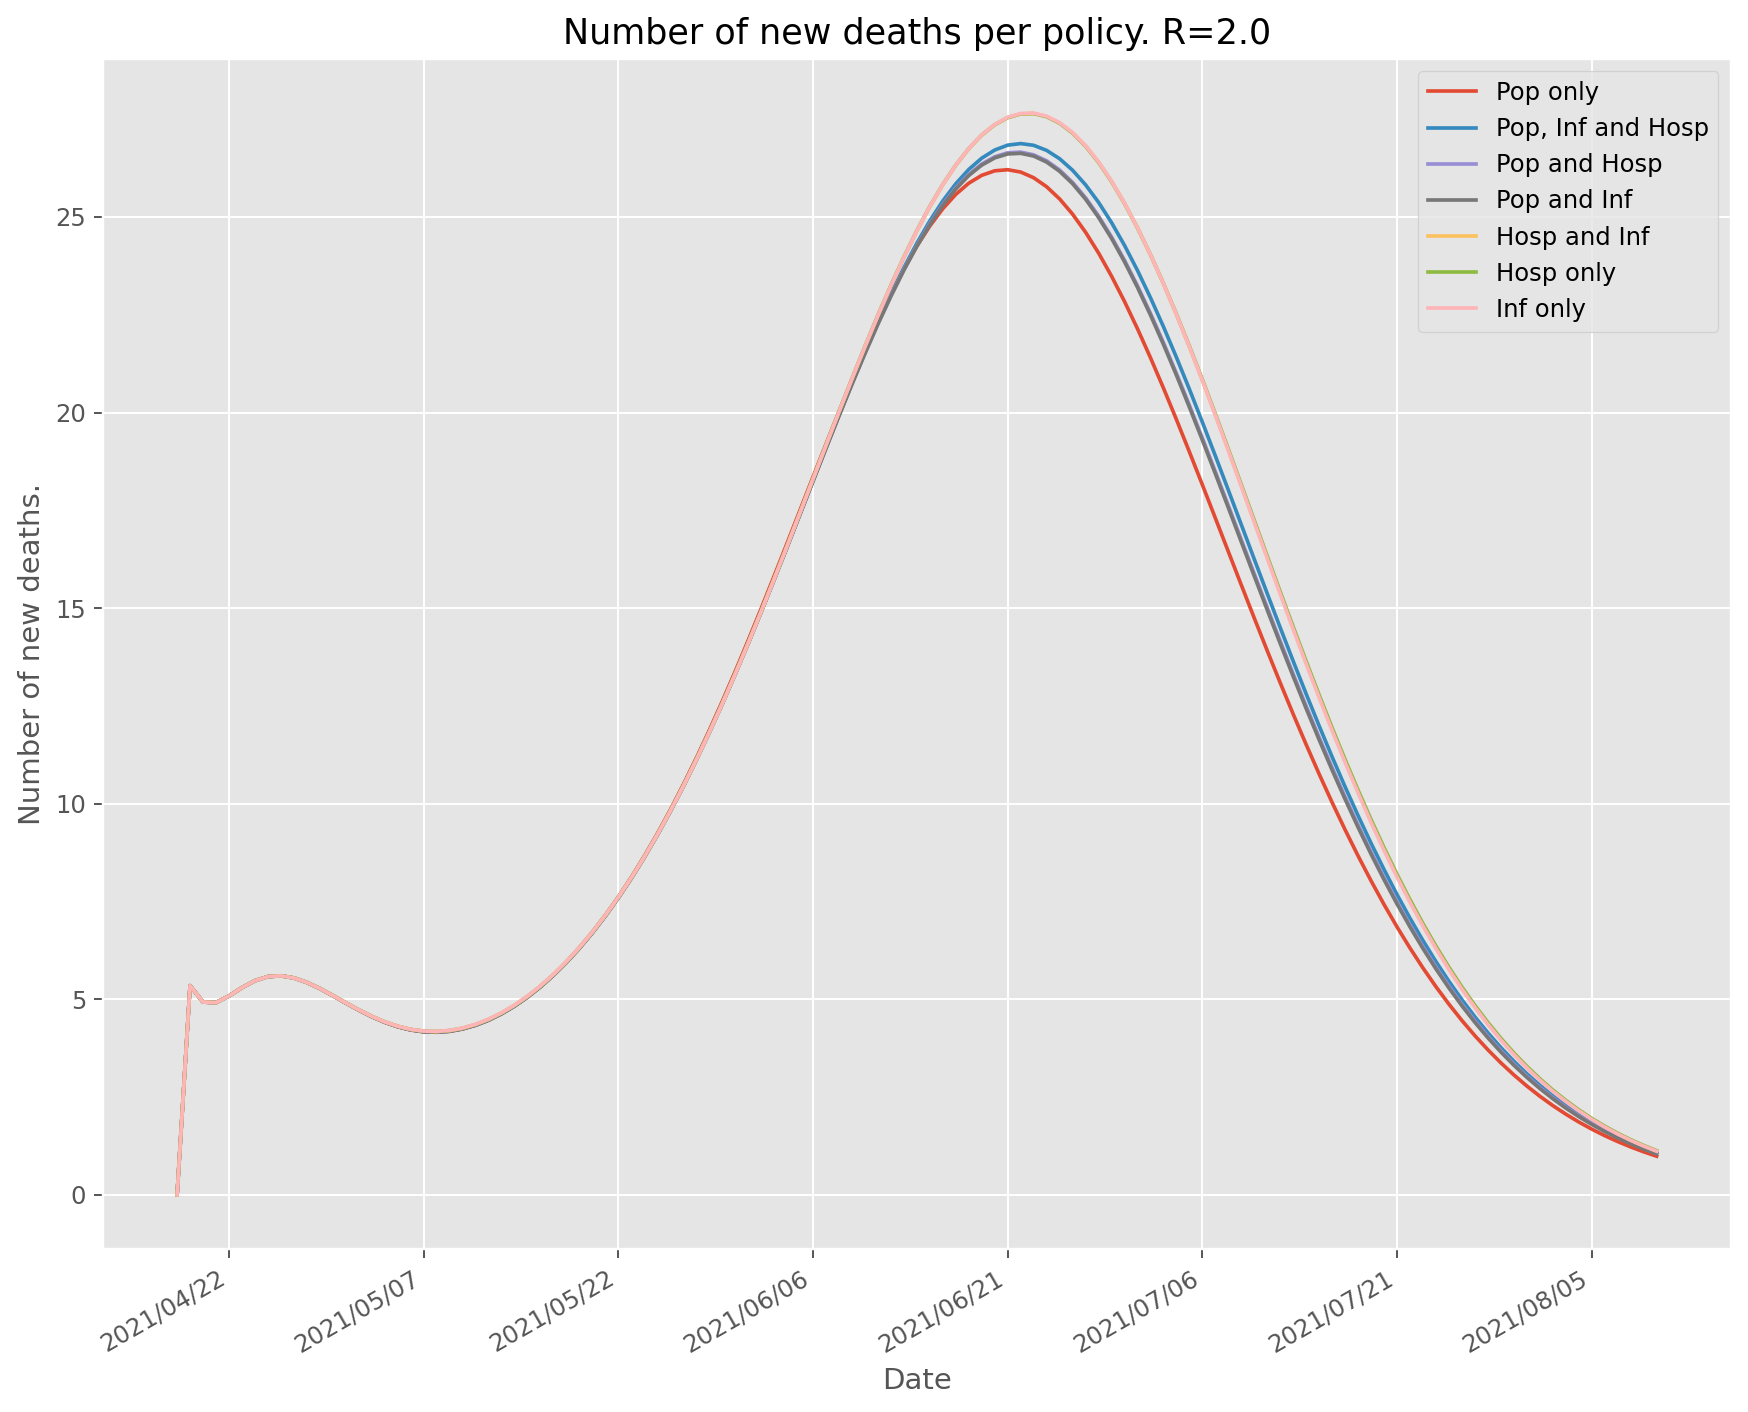

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 13131.52634128156
Hosp and Inf: 13145.851656590534
Hosp only: 13162.647995797348
Pop, Inf and Hosp: 13192.049422035474
Pop and Inf: 13231.875988245132
Pop and Hosp: 13244.604437296732
Pop only: 13499.184374680044


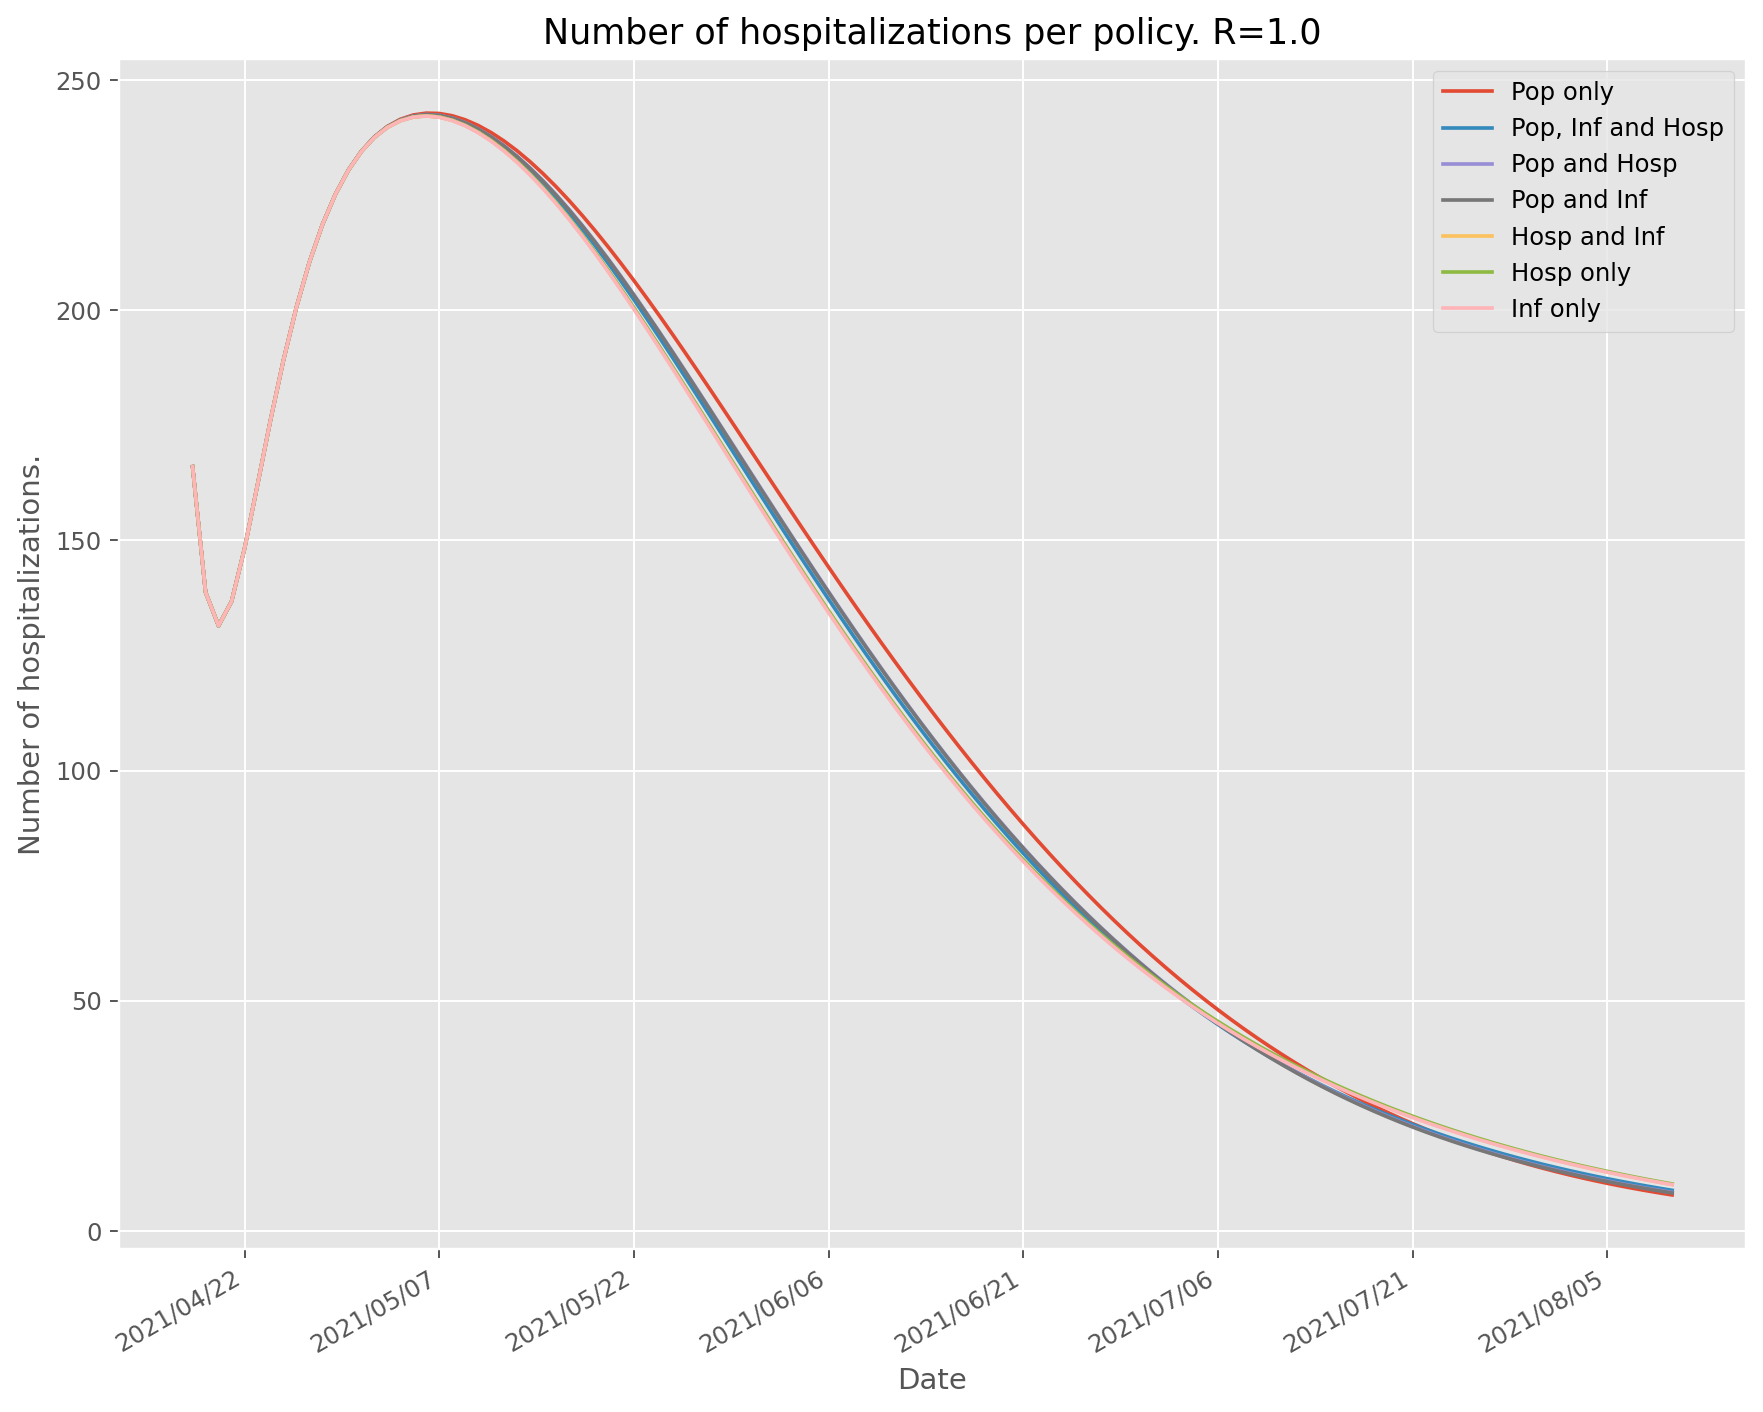

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 37019.00244132673
Pop and Hosp: 37118.88843612646
Pop, Inf and Hosp: 37177.357418251086
Inf only: 37623.2336560508
Pop only: 37664.57213869442
Hosp and Inf: 37704.12276426109
Hosp only: 37812.47382531882


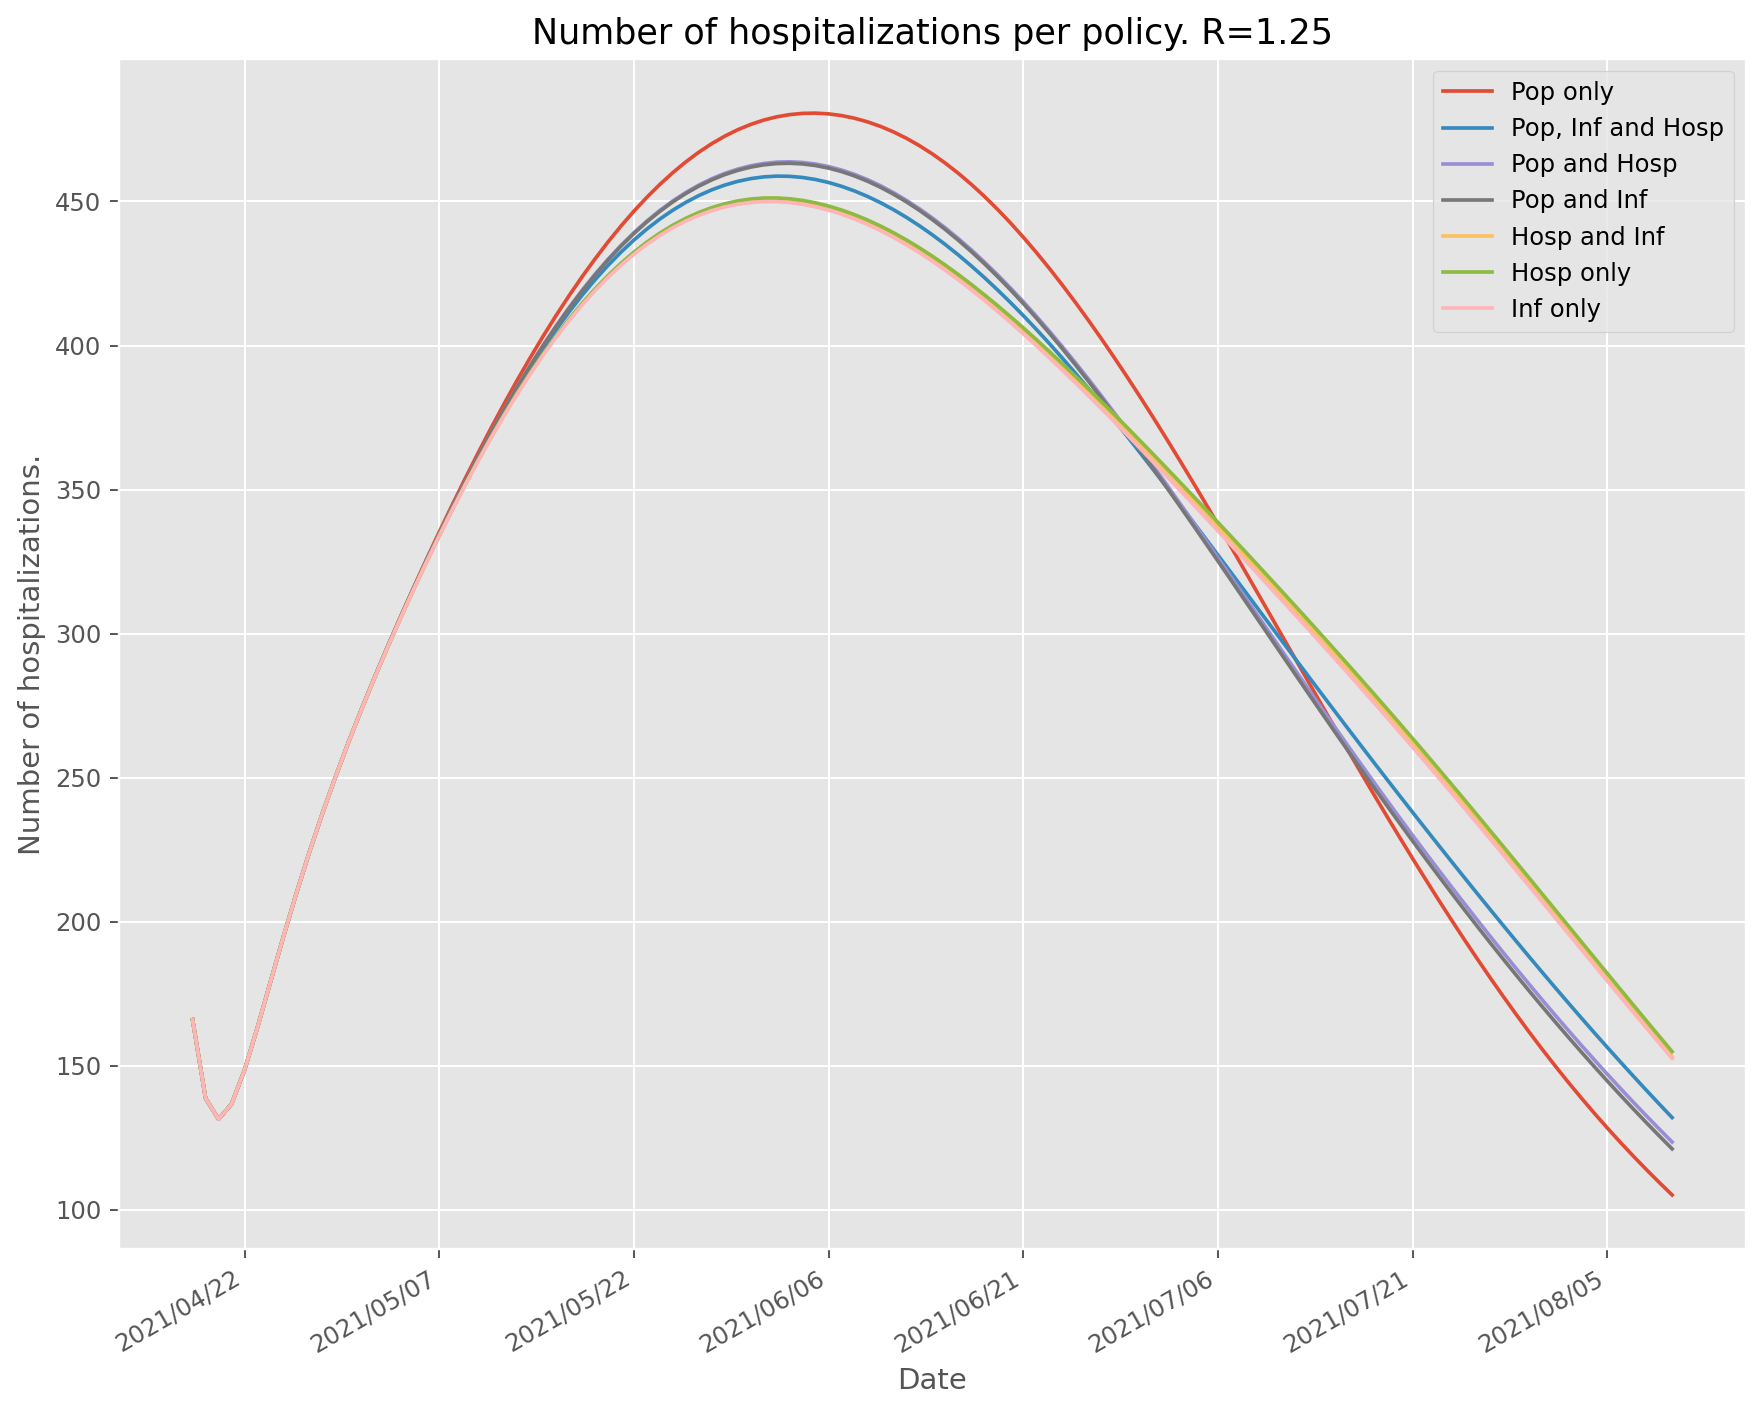

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 104909.81508645402
Pop and Inf: 106062.0007222363
Pop and Hosp: 106488.9847640679
Pop, Inf and Hosp: 107621.21869573975
Inf only: 110947.53042800185
Hosp and Inf: 111225.76347298827
Hosp only: 111628.80743096193


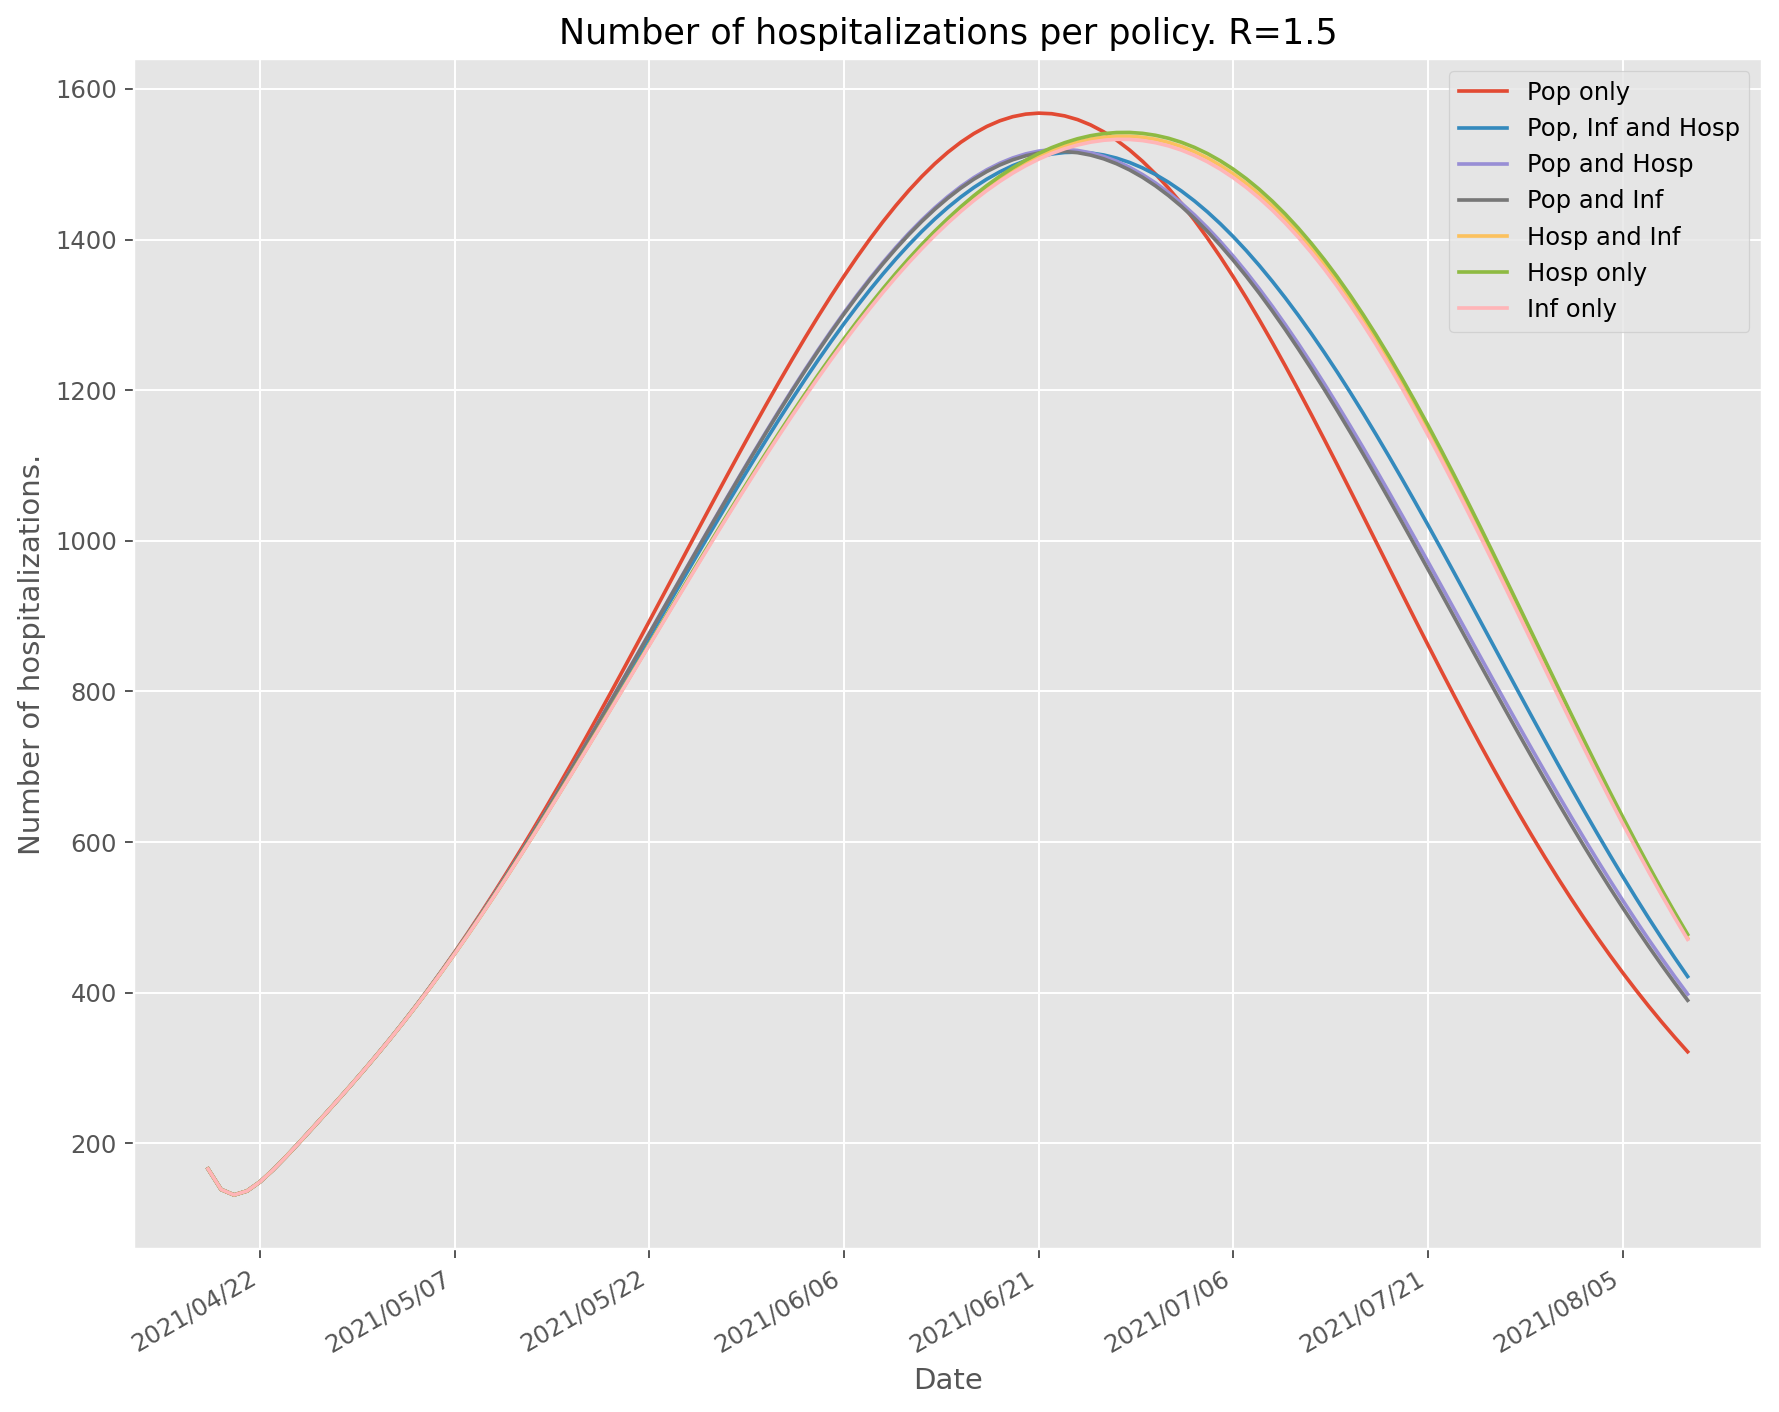

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 296981.9435000927
Pop and Inf: 303146.93225819746
Pop and Hosp: 303926.2410707937
Pop, Inf and Hosp: 306962.2234426308
Inf only: 315015.92094215757
Hosp and Inf: 315695.88429544313
Hosp only: 316553.4090488655


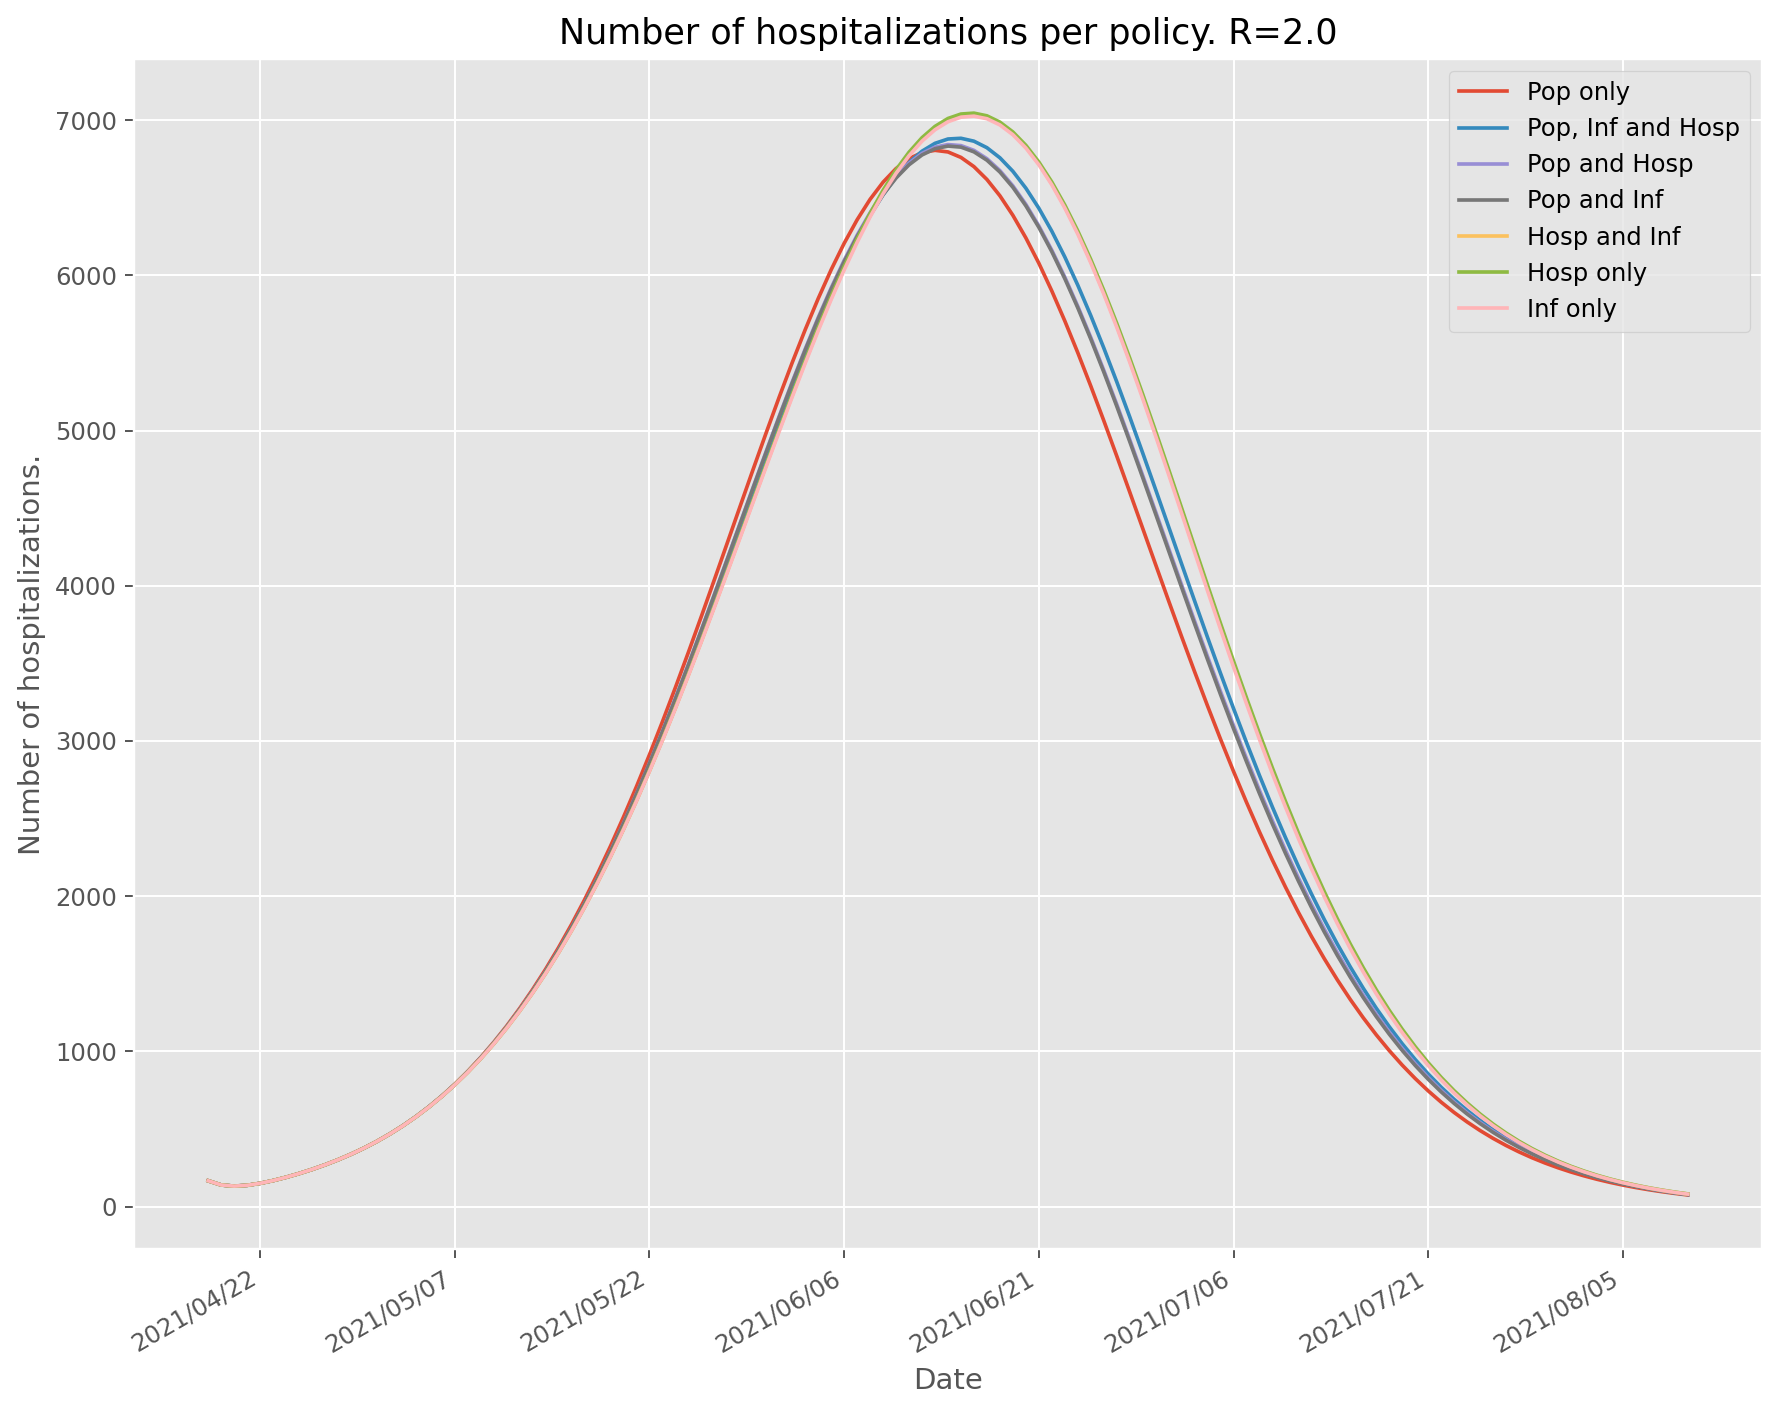

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# New Hospitalizations

Inf only: 2383.0004170492707
Hosp and Inf: 2385.865577976635
Hosp only: 2389.2370743592464
Pop, Inf and Hosp: 2394.5513153938846
Pop and Inf: 2402.146604089124
Pop and Hosp: 2404.7170735707105
Pop only: 2454.7773072195255


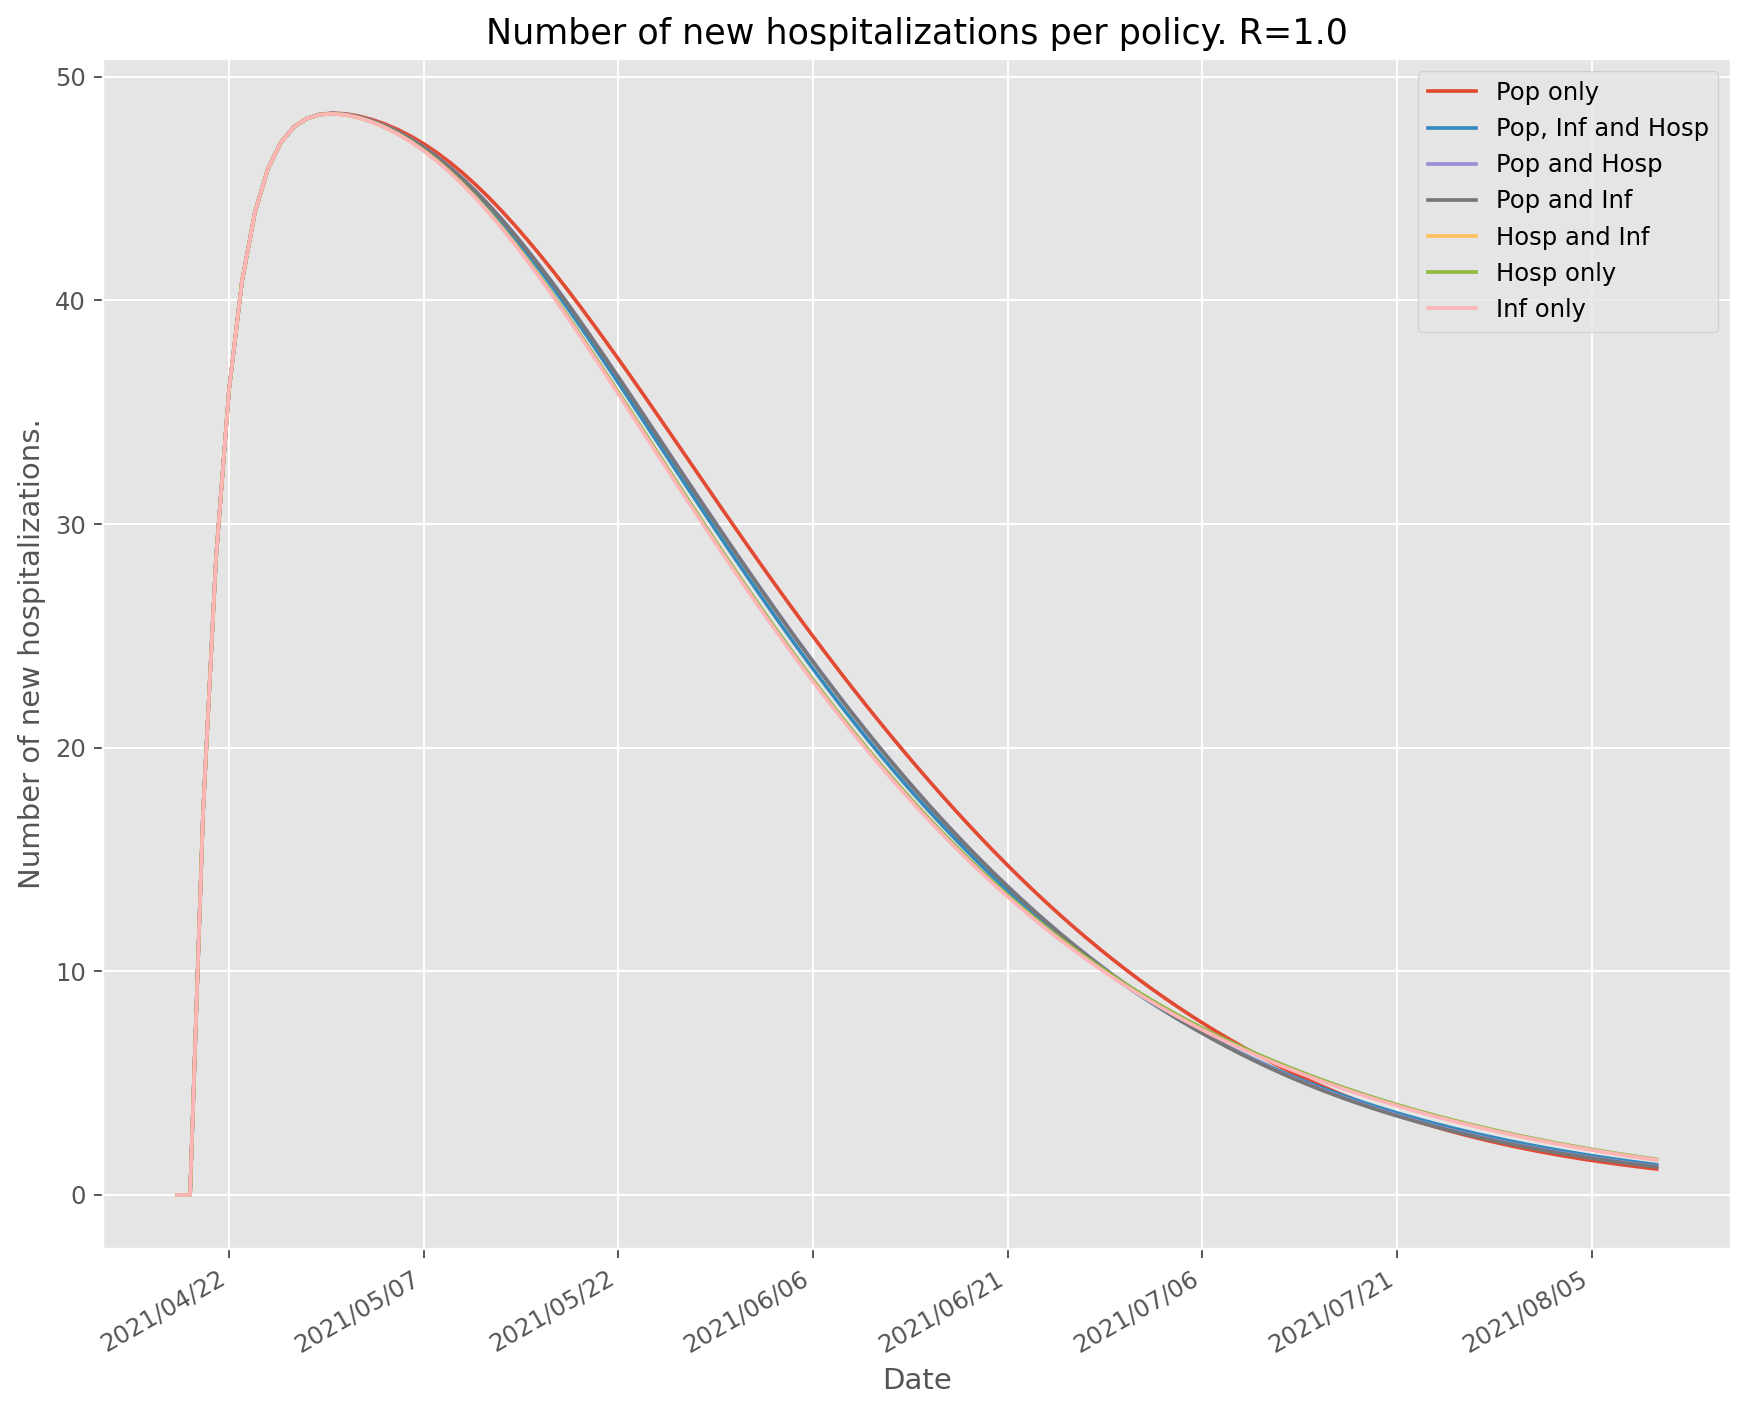

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 7173.8536532684275
Pop and Hosp: 7195.465981897126
Pop, Inf and Hosp: 7213.037847120107
Pop only: 7289.713307032055
Inf only: 7314.271088169431
Hosp and Inf: 7330.934792047582
Hosp only: 7353.839395526497


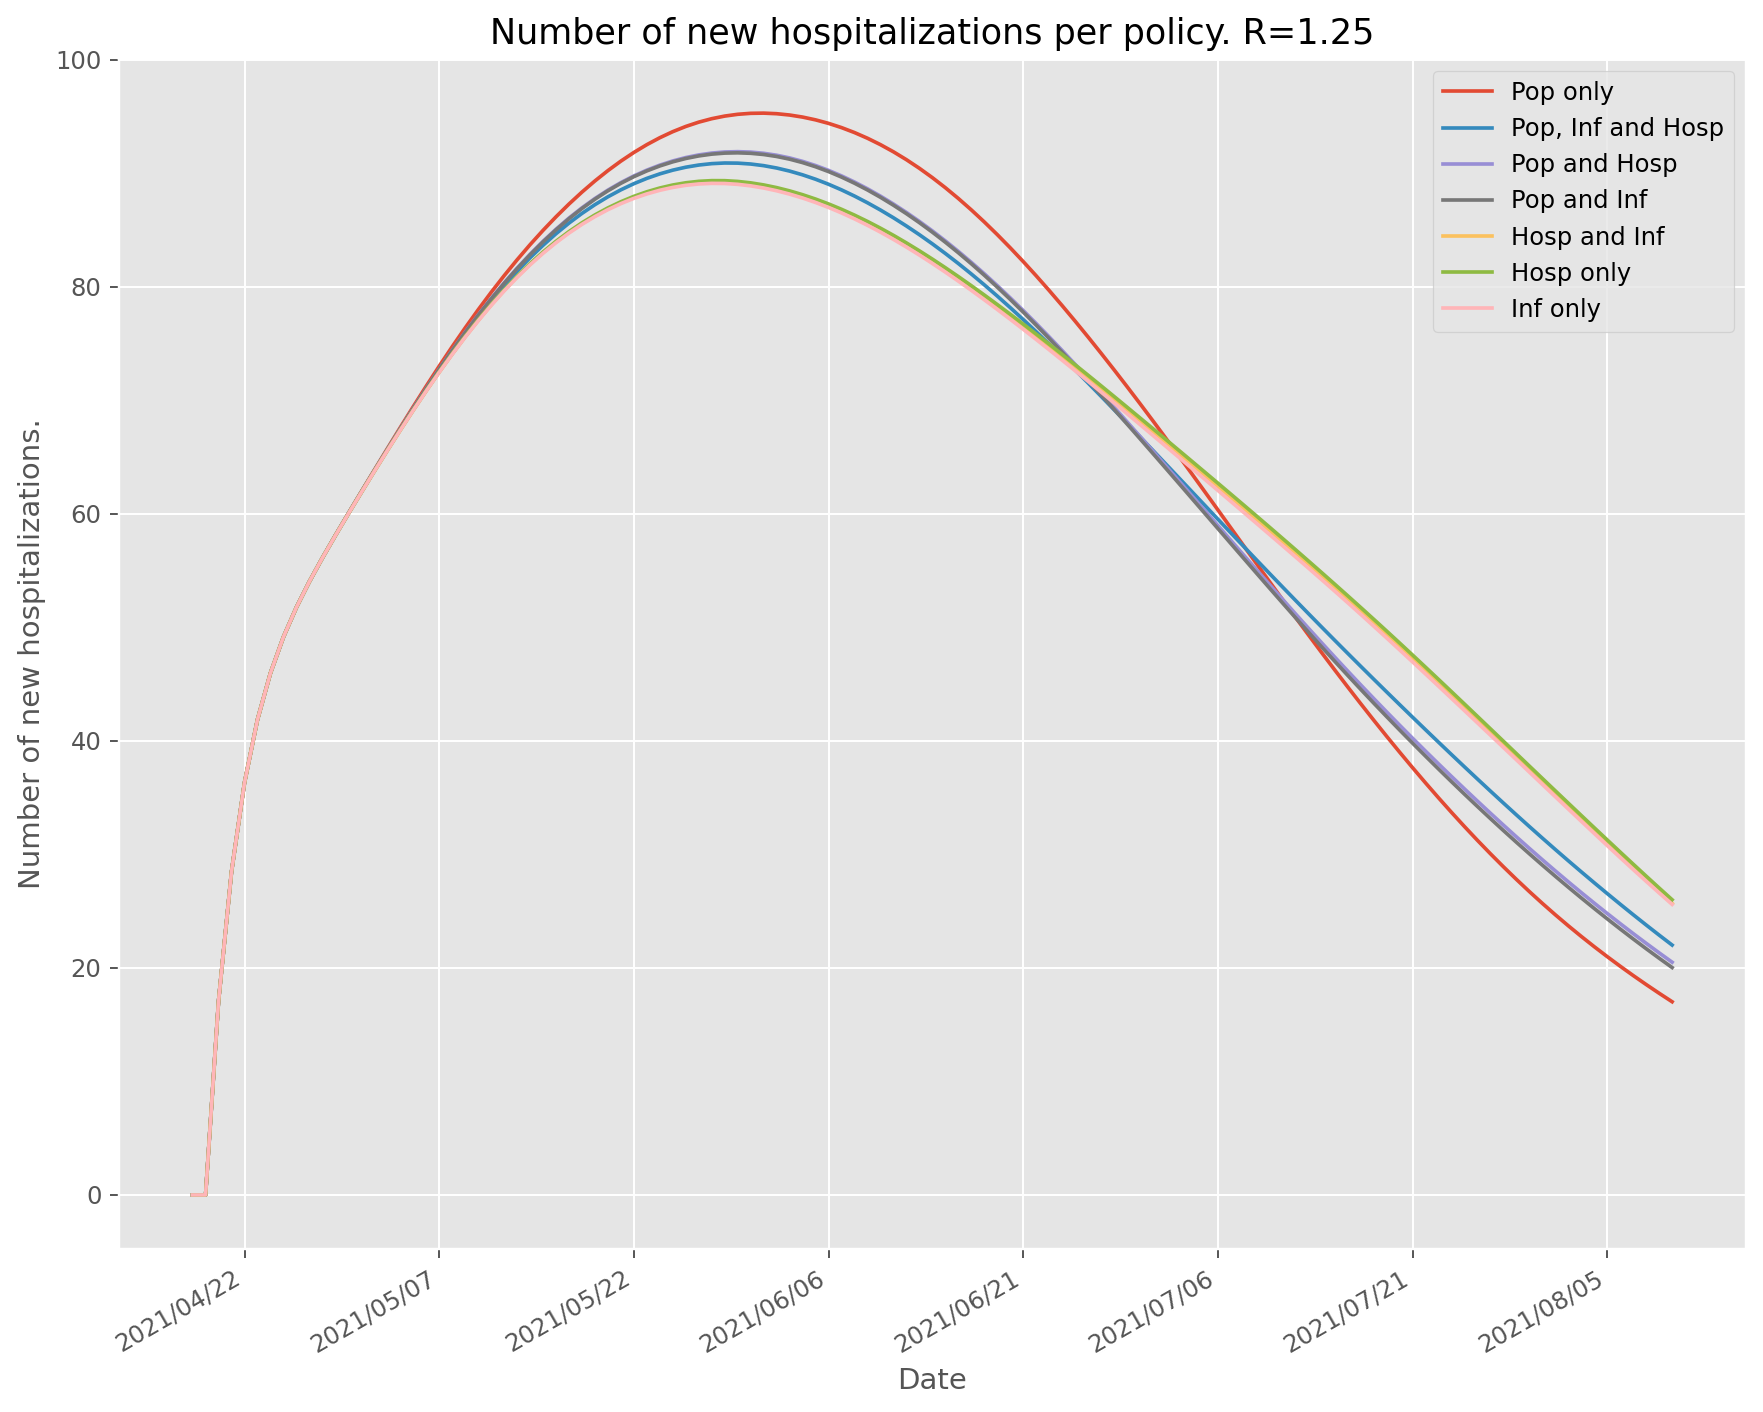

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 20690.005171687717
Pop and Inf: 20967.169233720688
Pop and Hosp: 21058.242987720398
Pop, Inf and Hosp: 21297.00487479521
Inf only: 21979.177553129888
Hosp and Inf: 22036.424663830596
Hosp only: 22120.6969451256


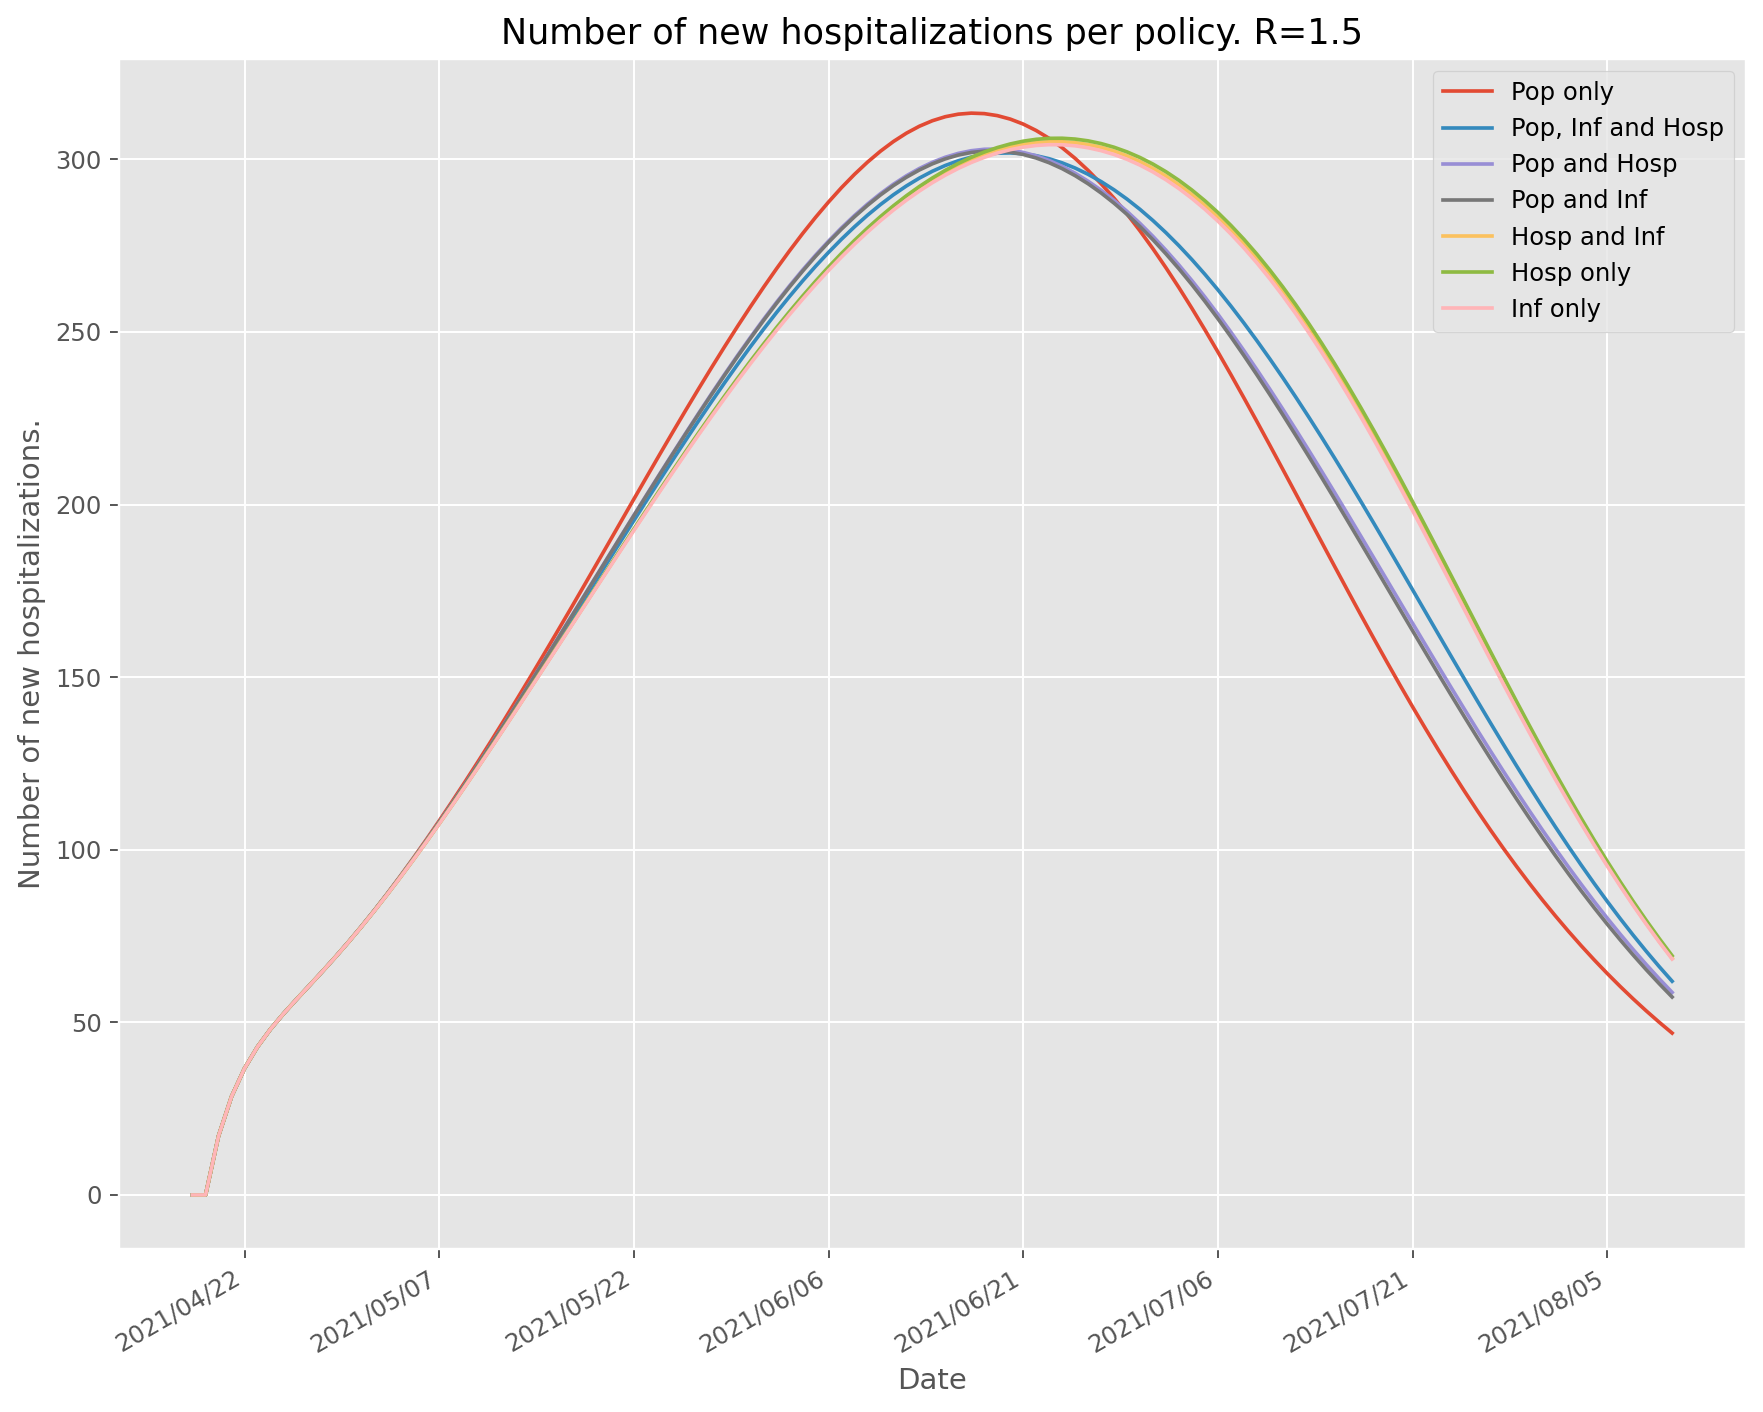

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 58173.98900837987
Pop and Inf: 59366.95824865795
Pop and Hosp: 59521.865018661374
Pop, Inf and Hosp: 60103.91373413216
Inf only: 61632.027511217406
Hosp and Inf: 61769.66201169987
Hosp only: 61941.270175798985


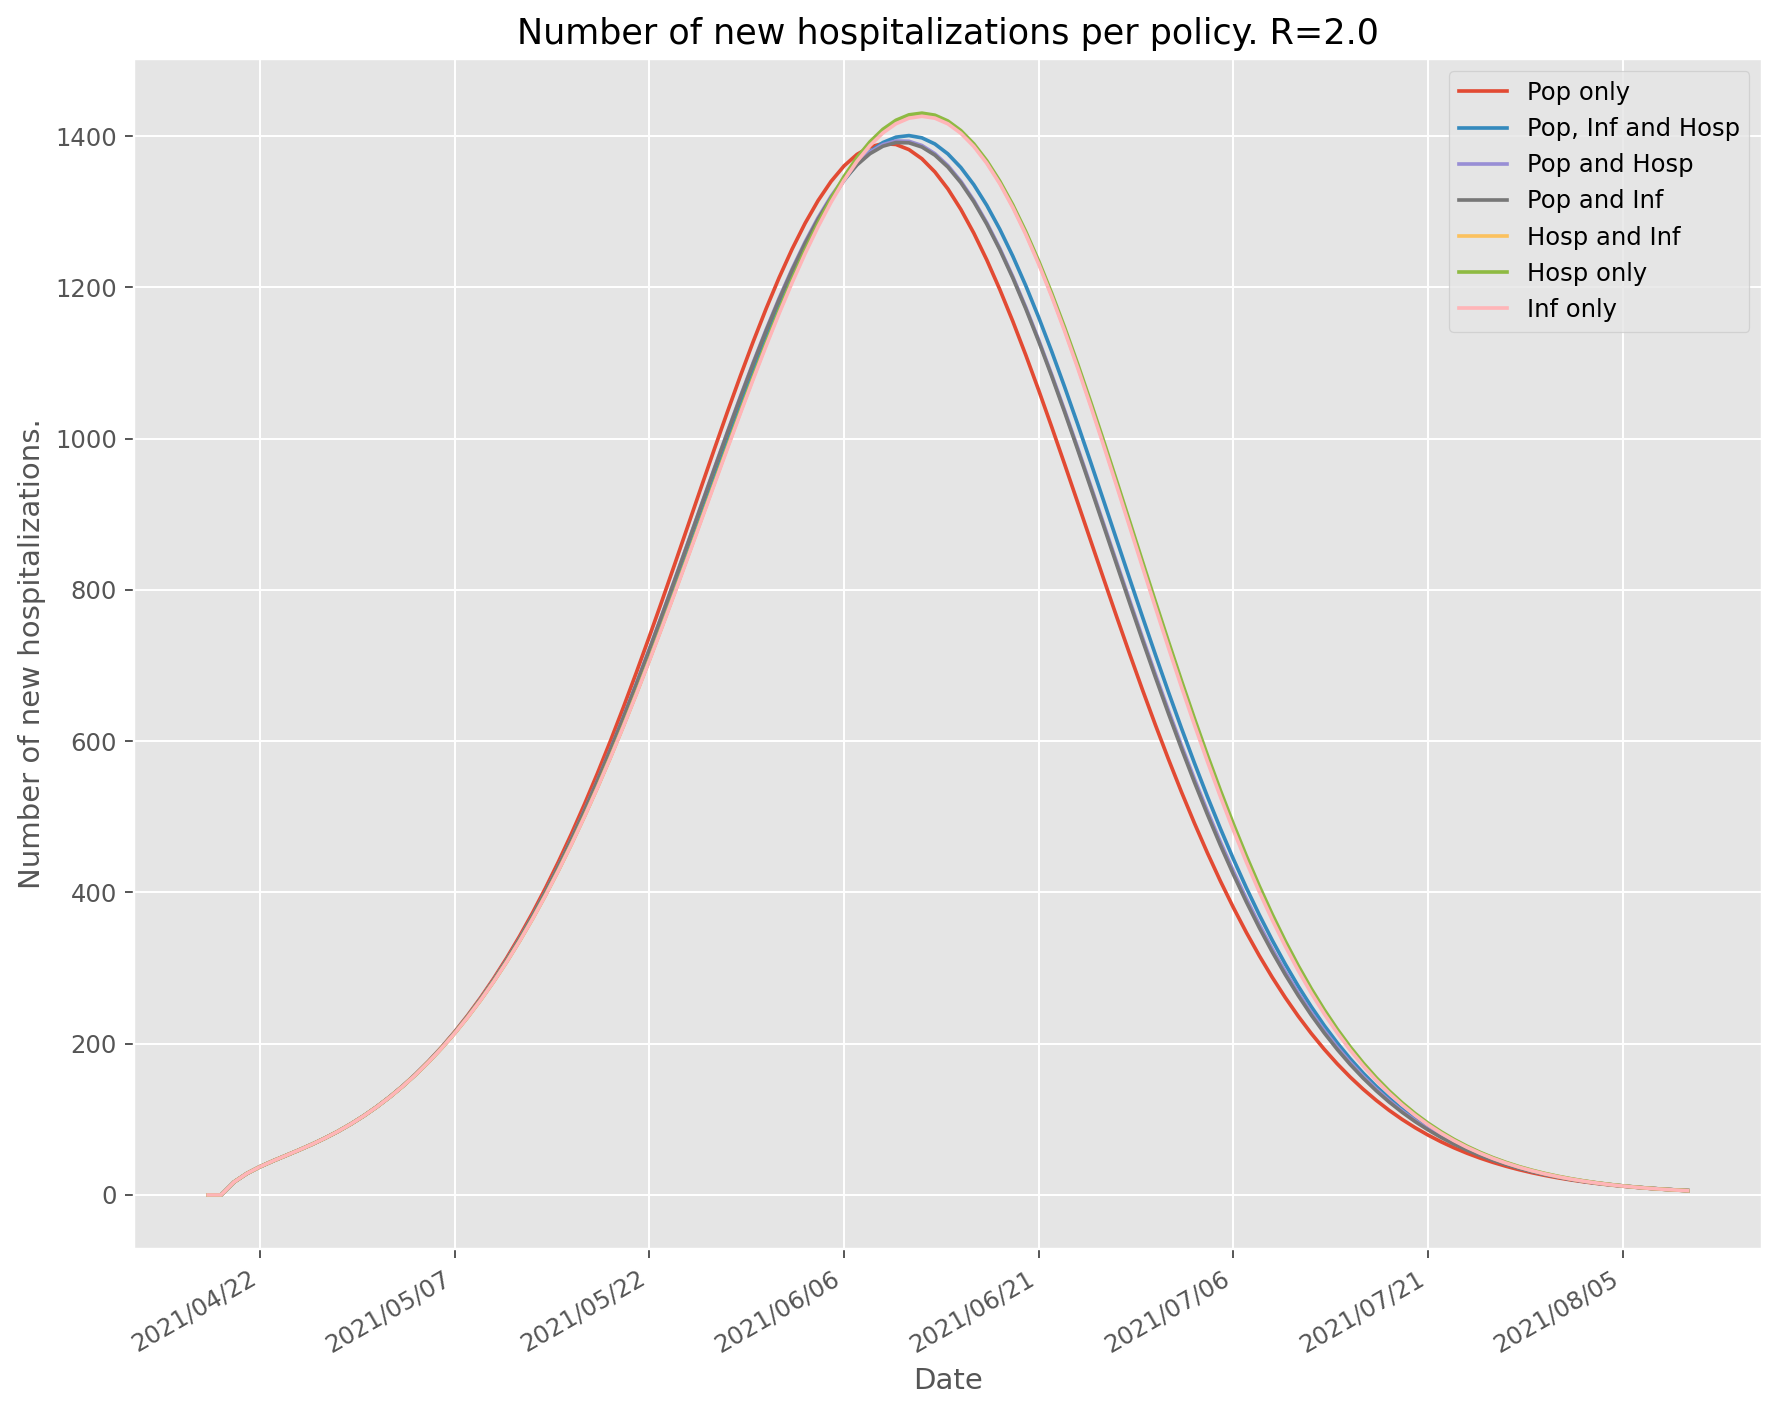

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Inf only: 344891.33371234254
Hosp and Inf: 345193.5831701073
Hosp only: 345485.70034909307
Pop, Inf and Hosp: 348773.6759410471
Pop and Inf: 350605.7675163054
Pop and Hosp: 350789.78604609566
Pop only: 358011.7469568929


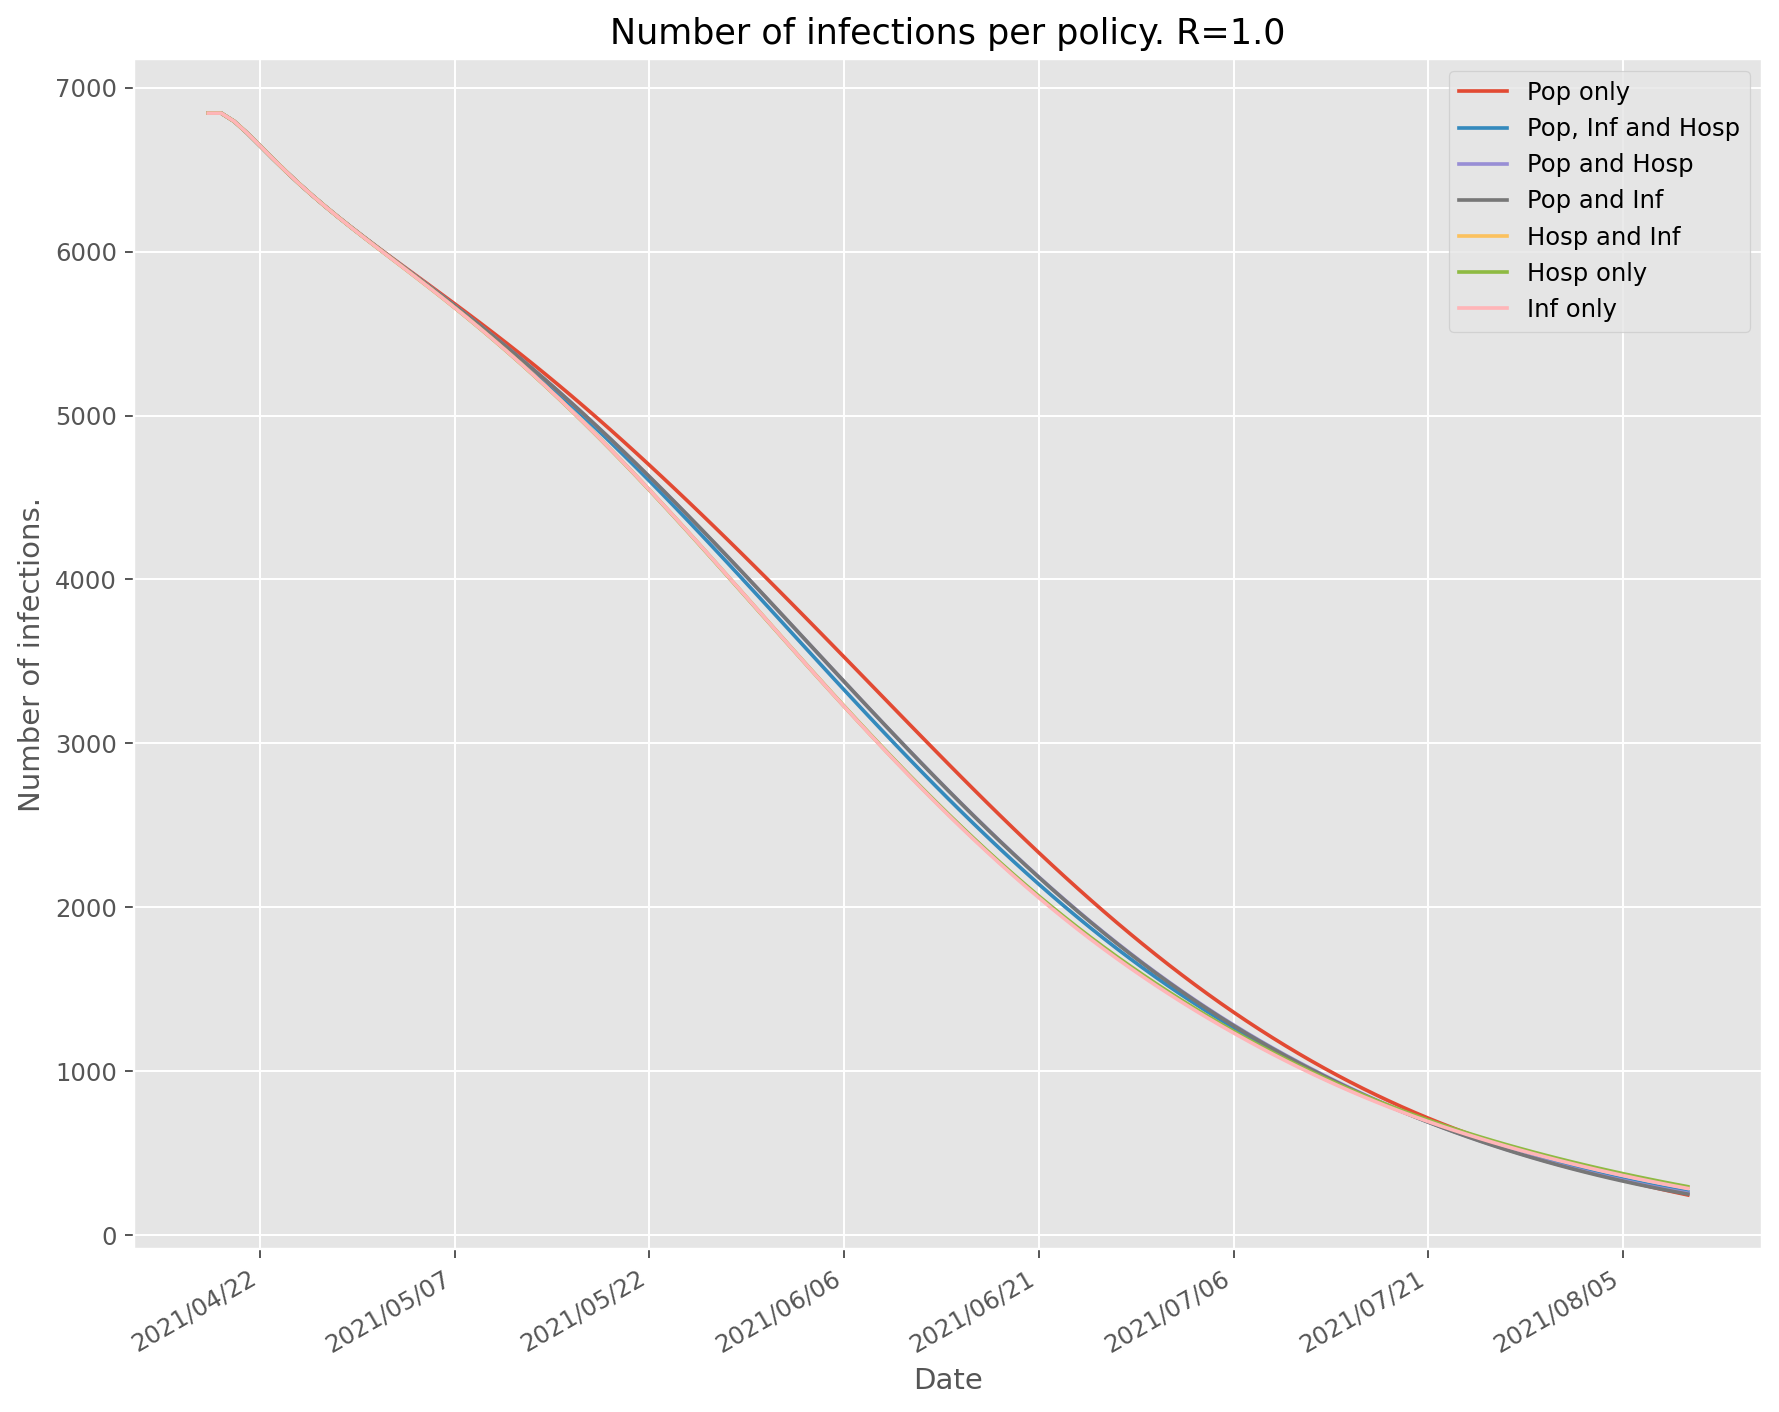

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 1191229.0045816815
Hosp and Inf: 1194517.4715504537
Pop, Inf and Hosp: 1197795.1219222692
Hosp only: 1197953.8375257396
Pop and Inf: 1198445.9679526351
Pop and Hosp: 1201239.5644191036
Pop only: 1220066.8444641903


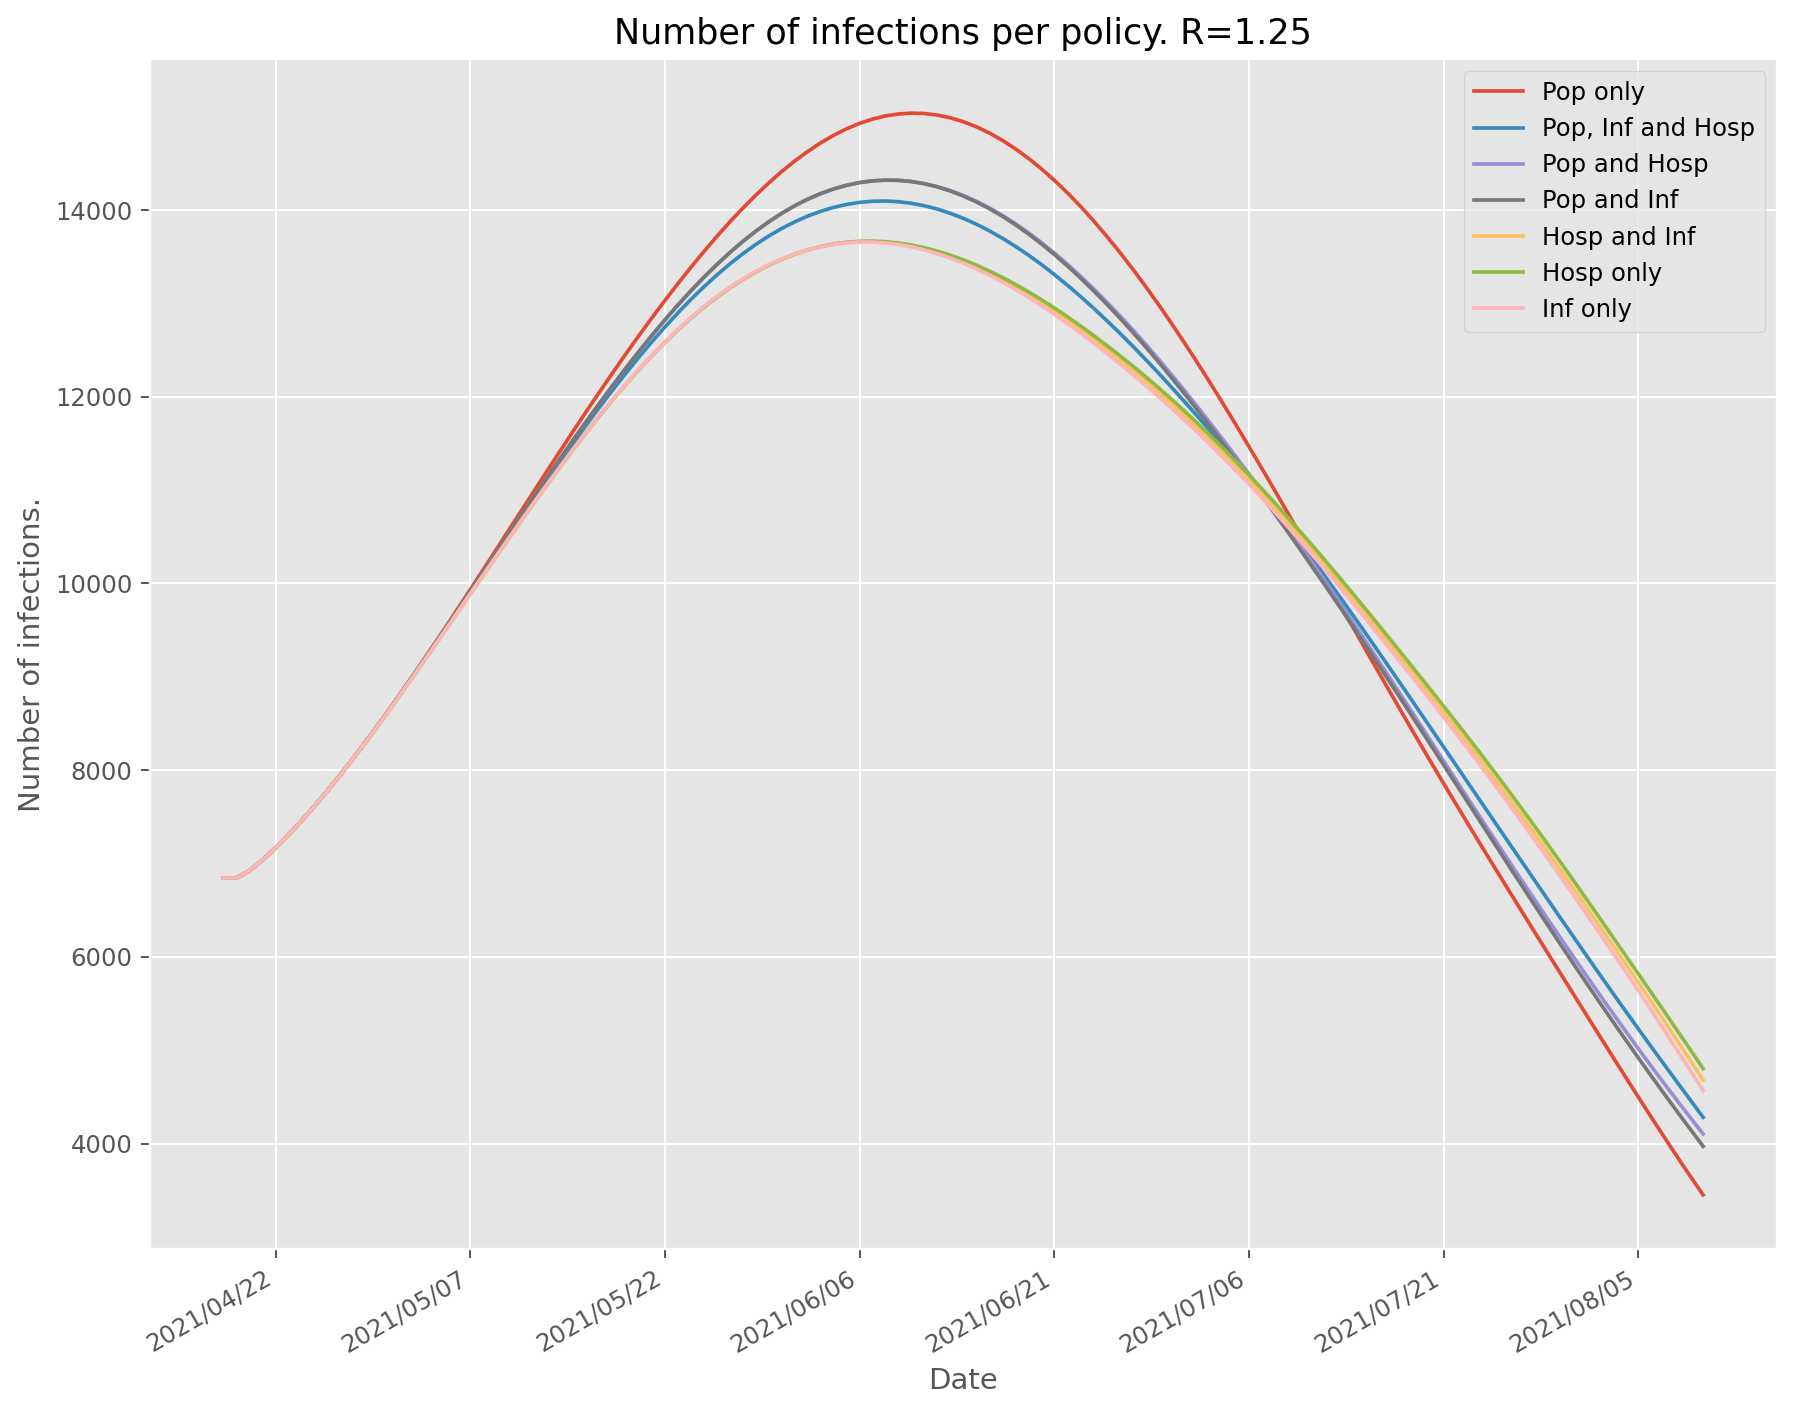

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 3465252.4917683126
Pop and Inf: 3477672.79320688
Pop and Hosp: 3488346.023337898
Pop, Inf and Hosp: 3494253.513849356
Inf only: 3500330.5856423075
Hosp and Inf: 3509928.600565121
Hosp only: 3520377.948496021


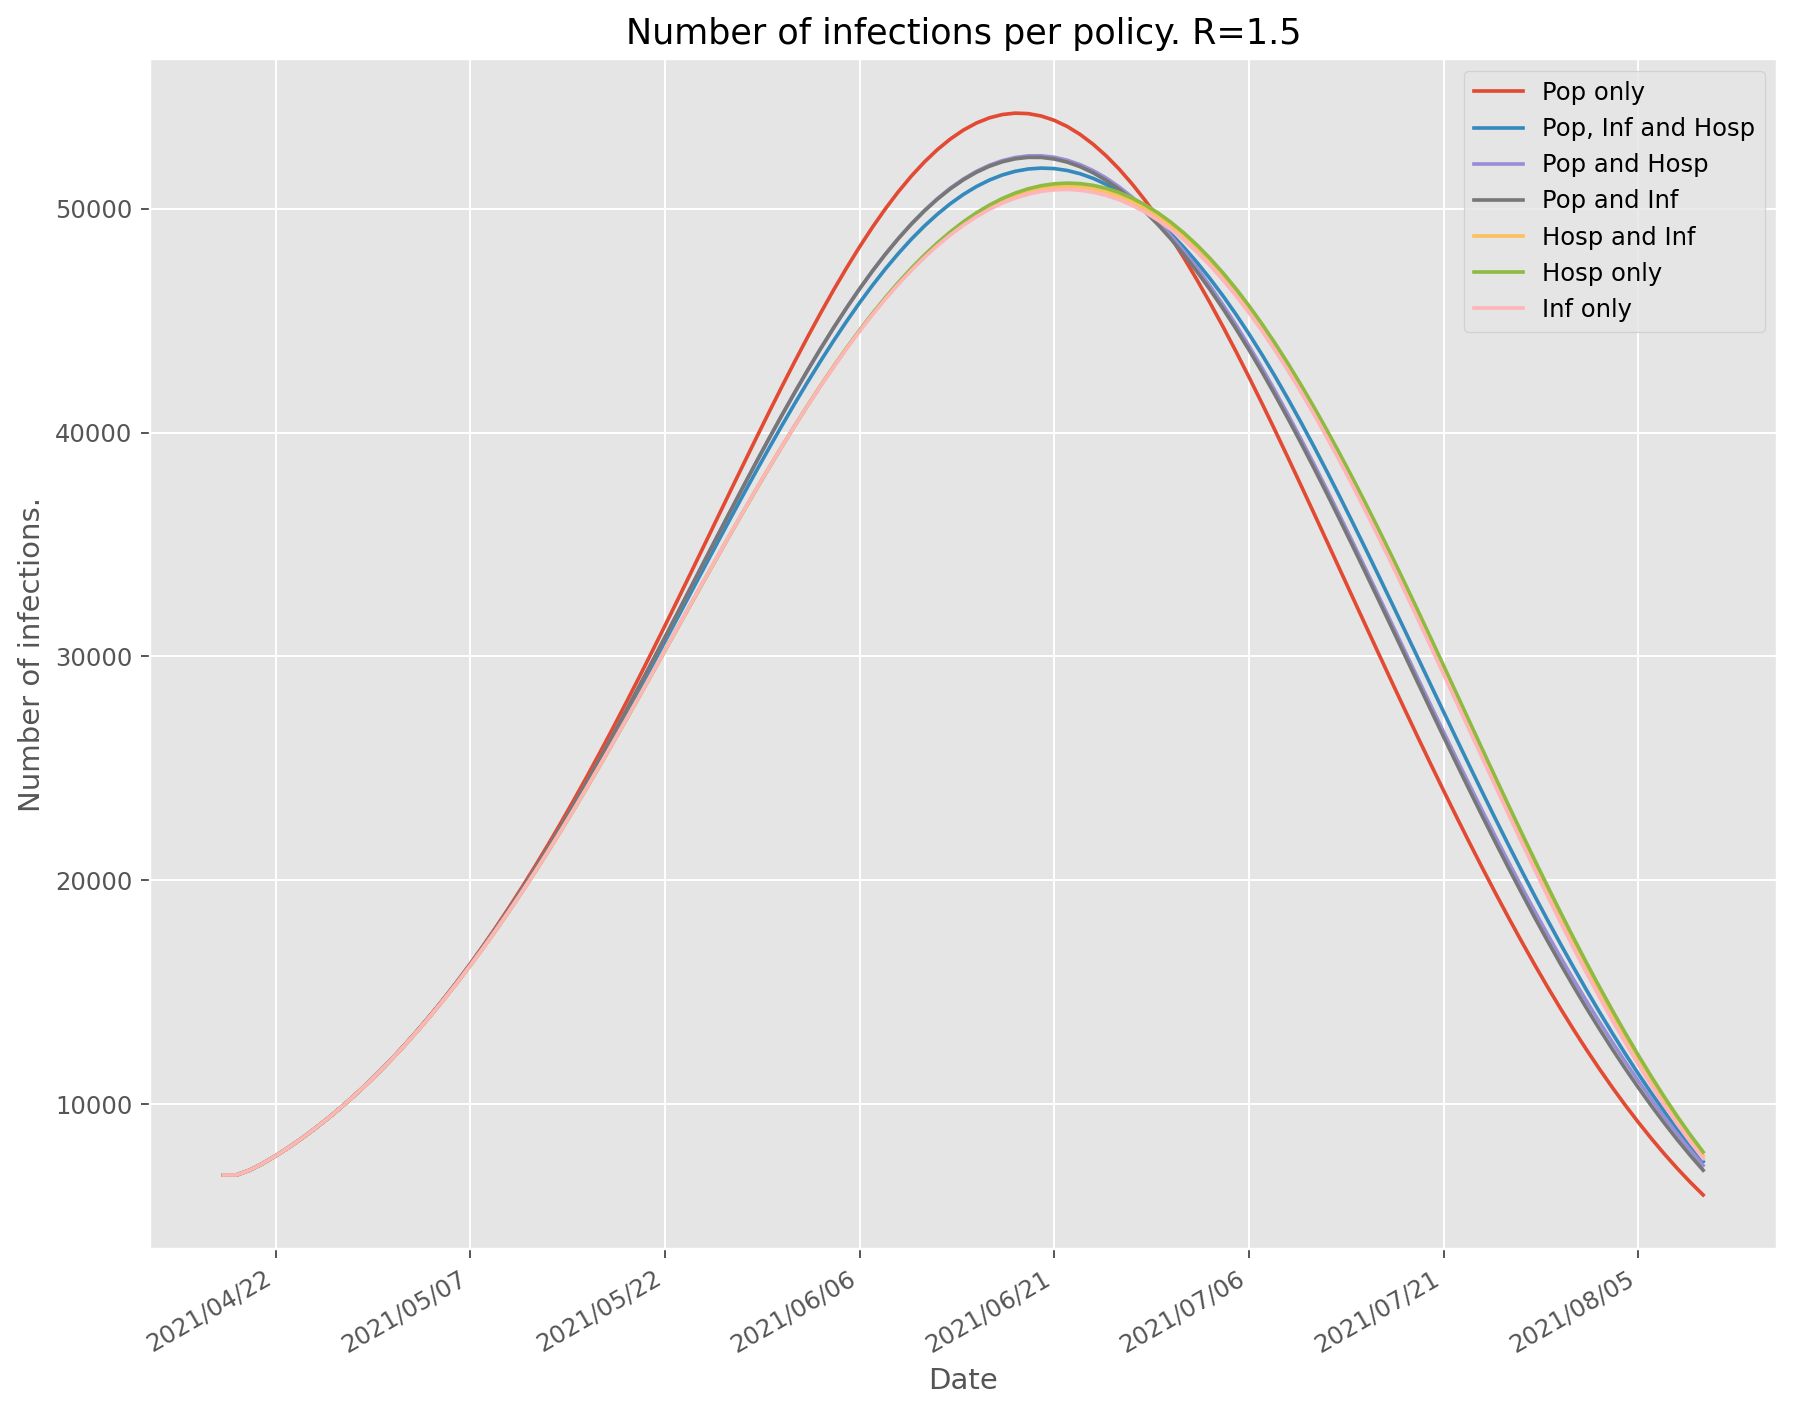

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 8158154.258513675
Pop and Inf: 8192654.359788629
Inf only: 8199296.9375522835
Pop and Hosp: 8202418.315859191
Pop, Inf and Hosp: 8205374.639752156
Hosp and Inf: 8208546.453668034
Hosp only: 8217944.97965962


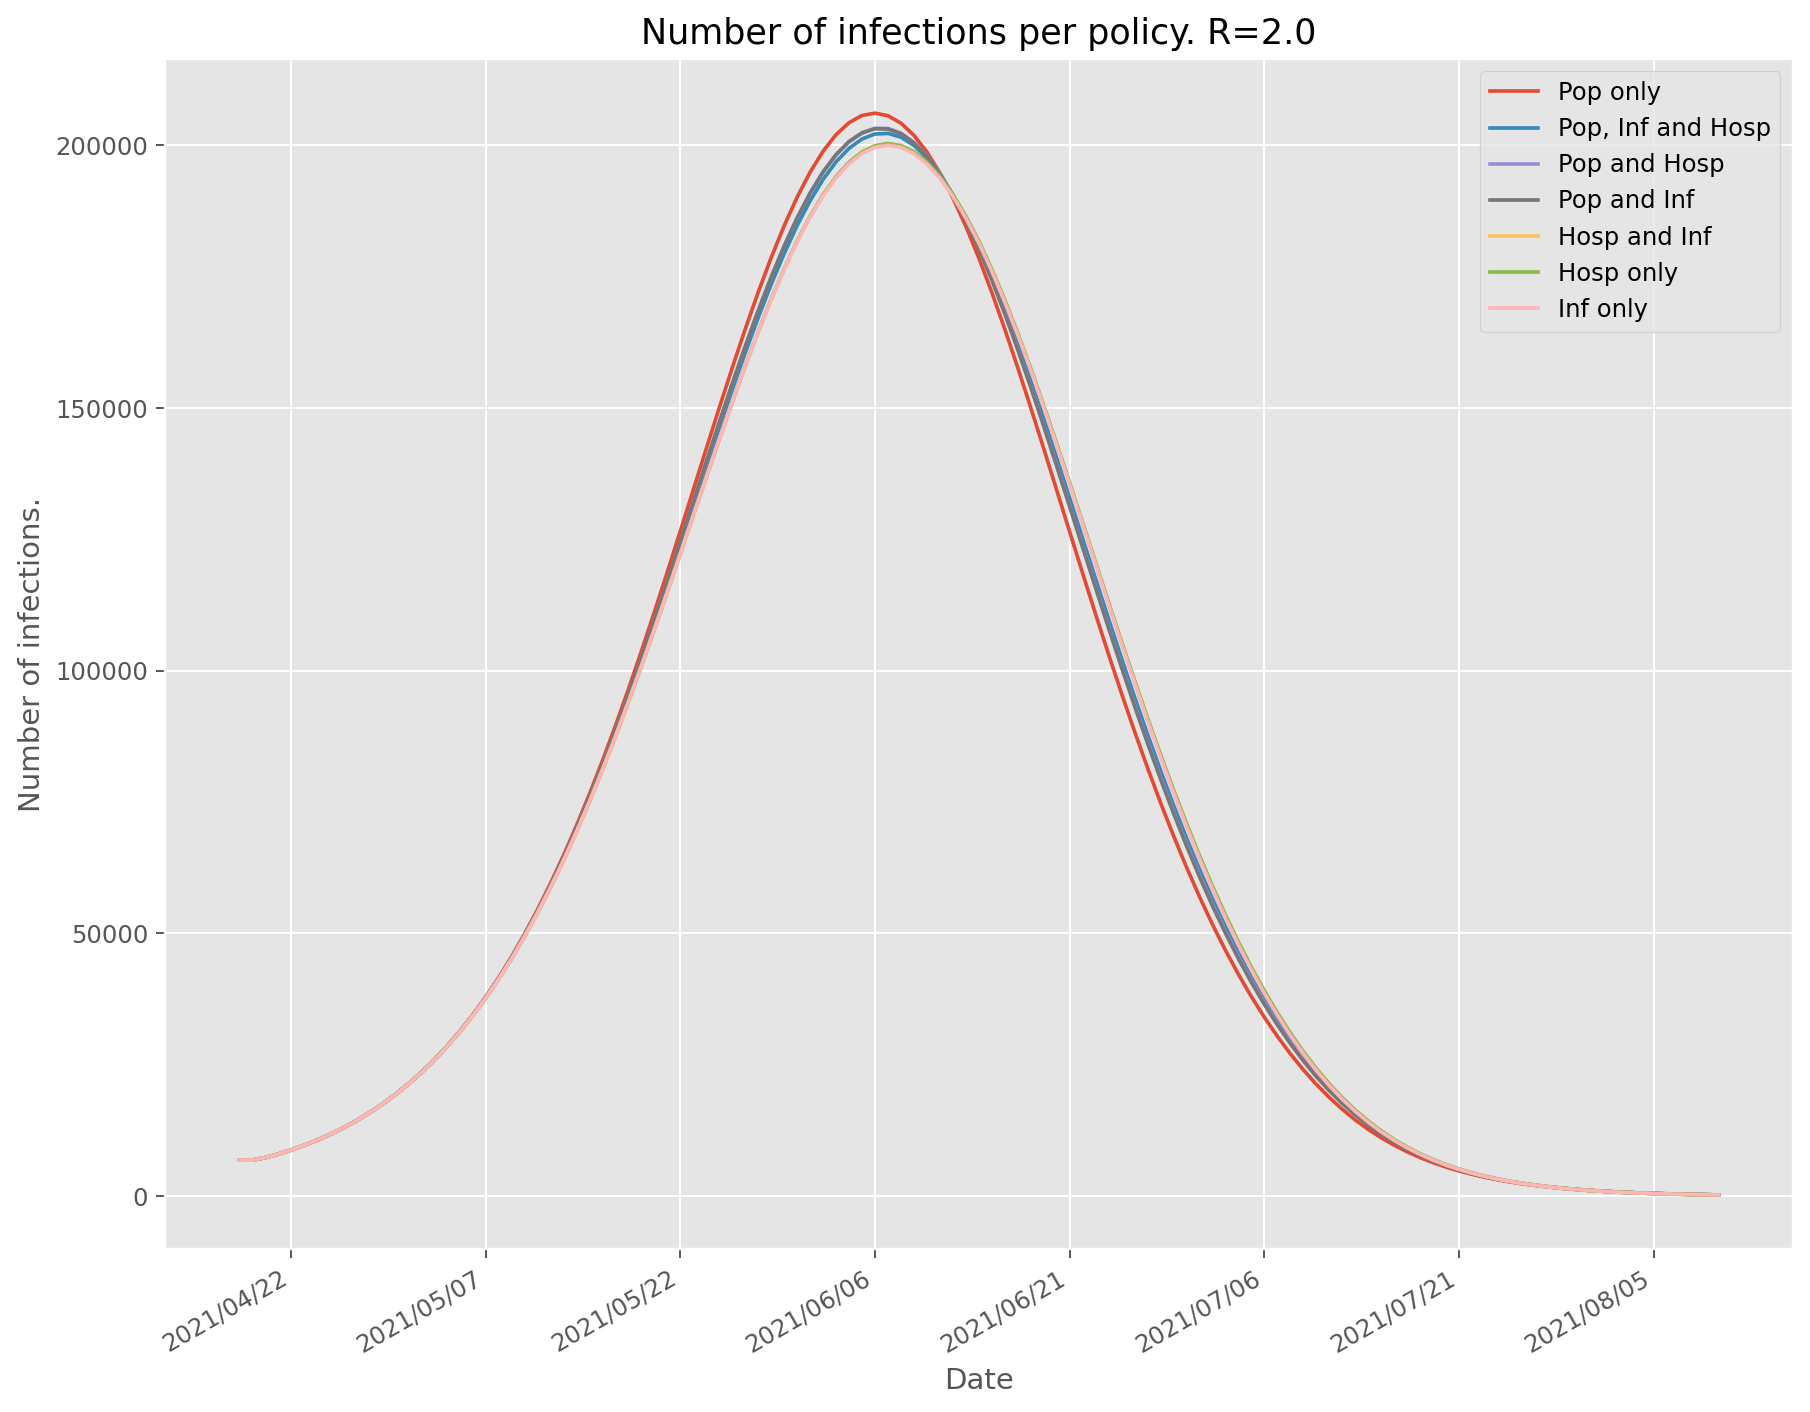

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()